<a href="https://colab.research.google.com/github/TraversaOlazabal/Data-Science-I/blob/main/ProyectoFinal_TraversaOlazabalAlejandro6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploración y Análisis de Datos en Aplicaciones** 📱


## Autor: Alejandro Traversa Olazabal 👨‍💻

🔗 https://www.linkedin.com/in/alejandro-traversa-olazabal/

🔗 https://github.com/TraversaOlazabal

## 📚 **Introducción:**
En este trabajo, se aplicaron técnicas de ciencia de datos para analizar un conjunto de datos de aplicaciones de Play Store. A través de la exploración, limpieza y visualización de los datos, se buscaron patrones y tendencias que permitieron extraer conclusiones relevantes sobre el comportamiento de las aplicaciones en función de su precio, descargas y calificaciones. Este análisis demuestra la utilidad de la ciencia de datos en la comprensión del mercado de apps y en la toma de decisiones informadas.

El proyecto incluyó un proceso riguroso de preparación de los datos: tratamiento de valores nulos y erróneos, codificación de variables, creación de nuevas columnas, análisis estadístico y visualizaciones. Luego, se desarrollaron y evaluaron distintos modelos de machine learning para predecir la cantidad de descargas de una app, con resultados limitados pero igualmente valiosos. También se exploraron otros enfoques predictivos con mejores desempeños, como estimar la cantidad de reseñas en base a las descargas.

Este trabajo recorre todas las etapas clave del ciclo de vida de un proyecto de ciencia de datos, demostrando cómo estas herramientas permiten generar conocimiento aplicable a la toma de decisiones en entornos reales.

## ¿Comenzamos? 🪐

# **1) Apps de Play Store**

El dataset reúne más de 10.000 aplicaciones de Play Store, actualizadas a agosto 2018, vamos a analizar el mercado de Android.

### 🔍 Origen

URL del Dataset: https://www.kaggle.com/datasets/lava18/google-play-store-apps/data

### 🔍 Resumen del dataset "googleplaystore.csv".

Este dataset contiene 10,841 registros de aplicaciones de Google Play Store y 13 columnas con información relevante sobre cada app.

### 📂 Variables principales y su significado:

**App**: Nombre de la aplicación.

**Category**: Categoría a la que pertenece (ej. "ART_AND_DESIGN", "GAME", "FINANCE").

**Rating**: Calificación promedio de los usuarios (escala de 1 a 5).

**Reviews**: Número de reseñas de los usuarios.

**Size**: Tamaño de la aplicación.

**Installs**: Número de instalaciones o descargas.

**Type**: Si la app es "Free" o "Paid" (gratuita o paga).

**Price**: Precio en dólares (o "0" si es gratuita).

**Content Rating**: Restricción de edad (Ej: "Everyone", "Teen", "Adults").

**Genres**: Género de la aplicación (puede tener múltiples géneros).

**Last Updated**: Última fecha de actualización.

**Current Ver**: Versión actual de la aplicación.

**Android Ver**: Versión mínima de Android requerida.


###	❓ Preguntas de interés
¿Cuáles son las categorías más populares según número de descargas?

¿Cuál es el promedio de rating o calificación de la Apps de Play Store?

¿Cuál es el tamaño promedio (en Mb) de las Apps?

¿Qué porcentaje del total de Apps son gratuitas?

¿Las Apps más descargadas poseen mejores calificaciones?

¿Las Apps pagas tienen mejor calificación que las gratuitas?

¿Cuántas Apps tienen más de 1 millón de descargas?

¿Qué categorías de Apps poseen mayor tamaño (en Mb)?

¿Las apps más grandes en tamaño tienen menos descargas?

¿Cuál es la categoría de Apps que posee mejor calificación?

### 🎯 Objetivo
El objetivo de este trabajo es realizar un análisis exploratorio del dataset de aplicaciones de Google Play Store para comprender mejor el mercado de apps en Android. A través de la exploración de variables clave como categoría, calificación, número de descargas, precio y tamaño, buscamos identificar patrones y tendencias que ayuden a responder preguntas relevantes sobre el comportamiento de los usuarios y las características de las aplicaciones más exitosas. Además, se analizará la relación entre distintas variables para evaluar factores como el impacto del precio en la cantidad de descargas, la influencia del tamaño de la app en su popularidad y la relación entre el número de reseñas y la calificación promedio. Este análisis permitirá obtener insights valiosos sobre el ecosistema de aplicaciones móviles y cómo ciertos factores pueden influir en el éxito de una app en la tienda.

### 💡 Hipótesis
Veamos la siguiente hipótesis que proponemos plantear y que podría resultar muy interesante para nuestro dataset:

**"Las apps con precios más altos tienden a tener menos descargas, pero su rating promedio es más alto en comparación con las apps gratuitas."**

*Variables involucradas:*

Price (Precio de la App)

Installs (Cantidad de instalaciones o descargas)

Rating (Calificación de la App)

*Justificación:*

Es probable que las Apps pagas tengan menos descargas, ya que los usuarios prefieren opciones gratuitas.
Sin embargo, quienes pagan por una app pueden ser más exigentes y dar calificaciones más altas si la app cumple sus expectativas.
Puede haber una relación inversa entre Price e Installs, pero positiva entre Price y Rating.


## 👨‍💻 **Comencemos a escribir código:**



Comenzamos importando las librerías que utilizaremos:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

A continuación, incorporamos el dataset a nuestro entorno de trabajo en Google Colab mediante la URL del archivo raw alojado en GitHub. Luego, lo convertimos en un DataFrame utilizando la librería Pandas, consultamos su cantidad de filas y columnas, y visualizamos una pequeña muestra para verificar que se haya cargado correctamente:

In [ ]:
# Enlace directo al archivo en GitHub
apps_url = 'https://raw.githubusercontent.com/TraversaOlazabal/DataScience-Datasets/refs/heads/main/googleplaystore.csv'
df_apps = pd.read_csv(apps_url)

print("Dimensiones del dataset (filas, columnas):", df_apps.shape)
df_apps.head()

Dimensiones del dataset (filas, columnas): (10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# **Exploratory Data Analysis (EDA)** 🧠📊

A continuación, obtenemos información general sobre las variables del dataset, incluyendo el tipo de dato que representan y la cantidad de valores no nulos en cada una. Esta exploración inicial nos permite detectar la presencia de valores faltantes (NaN) y comenzar a planificar su tratamiento.

In [ ]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Una vez obtenida una visión general del dataset, el siguiente paso consiste en verificar la presencia de registros duplicados. Esta revisión es fundamental para asegurar la calidad de los datos y evitar que la información repetida distorsione los análisis posteriores:

In [ ]:
# Contar registros duplicados
df_apps.duplicated().sum()

np.int64(483)

Efectivamente, se identificaron 483 registros duplicados. Para garantizar la integridad y precisión del análisis, procedemos a eliminarlos del dataset:

In [ ]:
df_apps = df_apps.drop_duplicates().reset_index(drop=True)

Una vez eliminados los duplicados, volvemos a visualizar el dataset para verificar que los cambios se hayan aplicado correctamente y observar cómo queda conformado:

In [ ]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


En relación con las columnas numéricas, aplicamos el método describe() para obtener un resumen estadístico que nos permita analizar su comportamiento general: cantidad de datos, media, desviación estándar, valores mínimos, máximos y percentiles:







In [ ]:
df_apps.describe()

,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


En la celda anterior detectamos una inconsistencia en la columna "Rating", donde el valor máximo figura como 19, a pesar de que las calificaciones deberían estar en una escala de 1 a 5. Para corregir esta anomalía, primero identificaremos cuántos registros presentan valores fuera del rango esperado:

In [ ]:
# Contar cuántos valores incorrectos hay en Rating
df_apps[df_apps["Rating"] > 5].shape[0]

1

Dado que se trata de un único registro con un valor erróneo, procedemos a corregirlo reemplazándolo por el promedio de la columna "Rating", calculado sin considerar dicho valor atípico. Luego, verificamos que todos los valores restantes se encuentren dentro del rango esperado:

In [ ]:
# Calcular el promedio de la columna "Rating" sin contar el valor incorrecto
rating_mean = df_apps[df_apps["Rating"] <= 5]["Rating"].mean()

# Asignar el promedio a los valores mayores a 5
df_apps.loc[df_apps["Rating"] > 5, "Rating"] = rating_mean

df_apps.describe() #chequeo que el registro haya desaparecido

,Rating
count,8893.000000
mean,4.187877
std,0.522347
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


Con el objetivo de continuar validando la calidad de los datos, analizamos ahora los valores presentes en la columna "Category", para detectar posibles inconsistencias o registros incorrectos:

In [ ]:
df_apps["Category"].value_counts()

,count
Category,
FAMILY,1943
GAME,1121
TOOLS,843
BUSINESS,427
MEDICAL,408
PRODUCTIVITY,407
PERSONALIZATION,388
LIFESTYLE,373
COMMUNICATION,366


Detectamos que el valor "1.9" no representa una categoría válida. Dado que se trata de un único caso, consideramos conveniente identificar a qué aplicación pertenece y reemplazar ese valor por la categoría que, según el contexto, resulte más adecuada:

In [ ]:
df_apps[df_apps["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,4.187877,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Comprobamos que la categoría correcta sería "PHOTOGRAPHY". Sin embargo, al analizar el resto de los datos del registro, notamos que los valores están desalineados: ninguno parece corresponderse con la variable que ocupa. Ante esta situación, y considerando además que se trata de un único caso no representativo del total, concluimos que lo más adecuado es eliminar el registro para evitar posibles errores en etapas posteriores del análisis:

In [ ]:
df_apps = df_apps.drop(index=9990).reset_index(drop=True)

Verificamos que el registro haya sido eliminado correctamente:

In [ ]:
df_apps[df_apps["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


A continuación, analizamos la columna "Reviews", que representa la cantidad de reseñas realizadas por los usuarios. Dado que se trata de una variable que debería ser numérica, comenzamos por verificar el tipo de datos que contiene para asegurarnos de que su formato sea el adecuado:

In [ ]:
# Filtrar valores que no sean números en la columna "Reviews"
valores_erroneos = df_apps[~df_apps["Reviews"].str.isnumeric()]
print(valores_erroneos)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


Ahora que sabemos que todos los valores son numéricos convertimos el tipo de datos (data type) de la columna en numérico:

In [ ]:
df_apps["Reviews"] = df_apps["Reviews"].astype(int)

Verificamos:

In [ ]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


Nos enfrentamos ahora a un desafío importante: normalizar la columna "Size" (tamaño de la app):



En primer lugar, reemplazaremos el valor "Varies with device" (“Varía según el dispositivo”) por NaN, ya que no proporciona un dato concreto y no puede ser procesado numéricamente. Luego, abordaremos el tratamiento de estos valores nulos, dado que es fundamental que esta variable sea completamente numérica para los análisis posteriores.

A continuación, eliminaremos las letras que acompañan los valores —como “M” para megabytes (MB) y “k” para kilobytes (KB)— y transformaremos aquellos valores expresados en kilobytes dividiéndolos por 1024, de modo que todos los datos estén unificados en la misma unidad de medida: megabytes (MB).

Por último, convertiremos el tipo de dato de esta columna a numérico, completando así el proceso de normalización:

In [ ]:
# Reemplazar "Varies with device" por NaN
df_apps["Size"] = df_apps["Size"].replace("Varies with device", np.nan)

# Asegurarse de que los valores con 'k' sean tratados correctamente antes de convertir la columna a texto
df_apps.loc[df_apps["Size"].str.contains("k", na=False), "Size"] = (
    df_apps.loc[df_apps["Size"].str.contains("k", na=False), "Size"]
    .str.replace("k", "", regex=False)
    .astype(float) / 1024  # Convertir de 'k' a MB
)

# Convertir la columna 'Size' a tipo texto
df_apps["Size"] = df_apps["Size"].astype(str)

# Eliminar la "M" en los valores que ya están en MB
df_apps["Size"] = df_apps["Size"].str.replace("M", "", regex=False)

# Convertir toda la columna a tipo float
df_apps["Size"] = df_apps["Size"].astype(float)

# Verificar los cambios
df_apps["Size"].head(60)

,Size
0,19.000000
1,14.000000
2,8.700000
3,25.000000
4,2.800000
5,5.600000
6,19.000000
7,29.000000
8,33.000000
9,3.100000


Una vez normalizada la variable "Size", pasamos al tratamiento de la columna "Installs" (cantidad de instalaciones).
Para limpiar sus valores, es necesario eliminar los símbolos “+” y “,”, presentes en cada registro, ya que impiden que la columna sea interpretada como numérica.

Luego de esta limpieza, se procede a convertir el tipo de dato de la variable —actualmente en formato string (str)— a formato numérico, permitiendo así su uso en análisis estadísticos y modelos predictivos:

In [ ]:
# Eliminar el símbolo "+" y las comas en la columna 'Installs'
df_apps["Installs"] = df_apps["Installs"].str.replace("+", "", regex=False)
df_apps["Installs"] = df_apps["Installs"].str.replace(",", "", regex=False)

# Intentar convertir la columna 'Installs' a tipo numérico
df_apps["Installs"] = pd.to_numeric(df_apps["Installs"], errors="raise")

# Verificar los primeros 60 registros después de la limpieza
df_apps["Installs"].head(60)

,Installs
0,10000
1,500000
2,5000000
3,50000000
4,100000
5,50000
6,50000
7,1000000
8,1000000
9,10000


Observamos que cantidad de valores distintos toma la variable:

In [ ]:
df_apps["Installs"].value_counts()

,count
Installs,
1000000,1488
10000000,1132
100000,1129
10000,1033
1000,890
100,710
5000000,683
500000,517
50000,474


Finalmente, creamos una nueva variable que agrupa la cantidad de descargas en bloques o rangos, en lugar de trabajar con los valores absolutos.

Esta transformación facilita la interpretación de los datos, permite identificar patrones más fácilmente y mejora la eficiencia en los análisis posteriores, especialmente al trabajar con modelos de clasificación o al explorar relaciones entre variables:

In [ ]:
# Definir los límites de los rangos
bins = [0, 1000, 10000, 100000, 1000000, 10000000, float('inf')]

# Nombres para cada rango
labels = ['0-1k', '1k-10k', '10k-100k', '100k-1M', '1M-10M', '10M+']

# Crear una nueva columna en el dataframe con los rangos
df_apps['Installs_binned'] = pd.cut(df_apps['Installs'], bins=bins, labels=labels, right=False)

# Ver los primeros registros para verificar
df_apps[['Installs', 'Installs_binned']].head()

,Installs,Installs_binned
0,10000,10k-100k
1,500000,100k-1M
2,5000000,1M-10M
3,50000000,10M+
4,100000,100k-1M


In [ ]:
df_apps["Installs_binned"].value_counts()

,count
Installs_binned,
1M-10M,2171
10M+,1883
0-1k,1791
100k-1M,1646
10k-100k,1507
1k-10k,1359


Veamos cómo quedó nuestra nueva variable creada! 👇

In [ ]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   App              10357 non-null  object  
 1   Category         10357 non-null  object  
 2   Rating           8892 non-null   float64 
 3   Reviews          10357 non-null  int64   
 4   Size             8831 non-null   float64 
 5   Installs         10357 non-null  int64   
 6   Type             10356 non-null  object  
 7   Price            10357 non-null  object  
 8   Content Rating   10357 non-null  object  
 9   Genres           10357 non-null  object  
 10  Last Updated     10357 non-null  object  
 11  Current Ver      10349 non-null  object  
 12  Android Ver      10355 non-null  object  
 13  Installs_binned  10357 non-null  category
dtypes: category(1), float64(2), int64(2), object(9)
memory usage: 1.0+ MB


Pasamos ahora a analizar la columna "Type". Observaremos los distintos valores que contiene para verificar que no existan errores o inconsistencias en esta variable:

In [ ]:
df_apps["Type"].value_counts()

,count
Type,
Free,9591
Paid,765


Efectivamente, la columna "Type" contiene únicamente dos valores: Free y Paid, los cuales son correctos y coherentes con el contexto de análisis.

Ahora es momento de normalizar la columna "Price". Para ello, primero eliminamos el símbolo de dólar de cada valor, lo que nos permitirá luego convertir la variable a un tipo de dato numérico y continuar con el análisis sin inconvenientes:

In [ ]:
# Limpiar y convertir "Price" a número
df_apps["Price"] = df_apps["Price"].str.replace("$", "", regex=False).astype(float)

In [ ]:
df_apps["Price"].value_counts()

,count
Price,
0.00,9592
0.99,146
2.99,125
1.99,73
4.99,70
...,...
3.61,1
394.99,1
1.26,1


En este caso, también generaremos una nueva variable a partir de una ya existente. Estableceremos rangos de precios para las distintas aplicaciones, lo que facilitará el análisis comparativo y permitirá relacionar esta información con otras variables al momento de realizar gráficos bivariables. Esta transformación resulta útil para detectar patrones y comportamientos según los distintos niveles de precios:

In [ ]:
# Definir los límites de los rangos
bins = [0, 0.01, 1, 5, 10, 50, float('inf')]

# Nombres para cada rango
labels = ['0-0.01', '0.01-1', '1-5', '5-10', '10-50', '50+']

# Crear una nueva columna en el dataframe con los rangos
df_apps['Price_binned'] = pd.cut(df_apps['Price'], bins=bins, labels=labels, right=False) # Esto hace que el límite superior no esté incluido en el bloque
#y se asigne a la siguiente categoría. Por ejemplo, un precio de 10 será asignado al bloque 10-50 y no al bloque 5-10.

# Ver los primeros registros para verificar
df_apps[['Price', 'Price_binned']].head()

,Price,Price_binned
0,0.0,0-0.01
1,0.0,0-0.01
2,0.0,0-0.01
3,0.0,0-0.01
4,0.0,0-0.01


In [ ]:
df_apps["Price_binned"].value_counts()

,count
Price_binned,
0-0.01,9592
1-5,456
0.01-1,146
5-10,86
10-50,54
50+,23


Observamos un registro aleatorio para asegurarnos de que el precio ha sido correctamente asignado al rango correspondiente en la nueva variable creada.

In [ ]:
df_apps.iloc[2007]

,2007
App,Arrhythmias and Dysrhythmias
Category,MEDICAL
Rating,NaN
Reviews,3
Size,24.00
Installs,500
Type,Paid
Price,1.00
Content Rating,Everyone
Genres,Medical


El registro se encuentra en el intervalo de precio correcto, sin embargo notamos que posee un sólo decimal luego de la coma (en la columna "Price"). Vamos a normalizar y hacer que todos los registros presenten la misma cantidad de decimales (2):

In [ ]:
pd.options.display.float_format = "{:.2f}".format

Veamos ahora:

In [ ]:
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_binned,Price_binned
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19.00,10000,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10k-100k,0-0.01
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14.00,500000,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,100k-1M,0-0.01
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.70,5000000,Free,0.00,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1M-10M,0-0.01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25.00,50000000,Free,0.00,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,10M+,0-0.01
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.80,100000,Free,0.00,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100k-1M,0-0.01


Perfecto! 💯 Analicemos ahora la variable "Content Rating":

In [ ]:
df_apps["Content Rating"].value_counts()

,count
Content Rating,
Everyone,8382
Teen,1146
Mature 17+,447
Everyone 10+,377
Adults only 18+,3
Unrated,2


Debemos reemplazar el valor "Unrated" por NaN para poder luego darle el tratamiento adecuado al caso:

In [ ]:
# Reemplazar "Unrated" por NaN en la columna 'Content Rating'
df_apps["Content Rating"] = df_apps["Content Rating"].replace("Unrated", np.nan)

Chequeamos que Unrated ya no forme parte como valor de la variable:

In [ ]:
df_apps["Content Rating"].value_counts()

,count
Content Rating,
Everyone,8382
Teen,1146
Mature 17+,447
Everyone 10+,377
Adults only 18+,3


Excelente! 🌟 Continuemos con el análisis de las variables de nuestro dataset, ahora analicemos la columna "Genres":

In [ ]:
df_apps["Genres"].value_counts()

,count
Genres,
Tools,842
Entertainment,588
Education,527
Business,427
Medical,408
...,...
Role Playing;Brain Games,1
Strategy;Education,1
Racing;Pretend Play,1


Esta variable no presenta errores.

Ahora trabajaremos con la variable "Last Update", que representa la fecha de la última actualización de cada aplicación. Para poder utilizarla correctamente en futuros análisis temporales, es necesario convertir su tipo de dato al formato fecha y hora (datetime):

In [ ]:
# Convertir la columna 'Last Update' a tipo datetime
df_apps["Last Updated"] = pd.to_datetime(df_apps["Last Updated"])

# Verificar los primeros registros
df_apps["Last Updated"].head(10)

,Last Updated
0,2018-01-07
1,2018-01-15
2,2018-08-01
3,2018-06-08
4,2018-06-20
5,2017-03-26
6,2018-04-26
7,2018-06-14
8,2017-09-20
9,2018-07-03


Verificamos:

In [ ]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              10357 non-null  object        
 1   Category         10357 non-null  object        
 2   Rating           8892 non-null   float64       
 3   Reviews          10357 non-null  int64         
 4   Size             8831 non-null   float64       
 5   Installs         10357 non-null  int64         
 6   Type             10356 non-null  object        
 7   Price            10357 non-null  float64       
 8   Content Rating   10355 non-null  object        
 9   Genres           10357 non-null  object        
 10  Last Updated     10357 non-null  datetime64[ns]
 11  Current Ver      10349 non-null  object        
 12  Android Ver      10355 non-null  object        
 13  Installs_binned  10357 non-null  category      
 14  Price_binned     10357 non-null  categ

Ahora revisaremos un resumen actualizado de nuestras variables numéricas. Podremos notar cómo ha aumentado su cantidad en comparación con la primera consulta, donde solo contábamos con una variable de este tipo:

In [ ]:
df_apps.describe().round(2)

,Rating,Reviews,Size,Installs,Price,Last Updated
count,8892.00,10357.00,8831.00,10357.00,10357.00,10357
mean,4.19,405904.61,21.29,14157759.44,1.03,2017-11-14 09:25:19.320266496
min,1.00,0.00,0.01,0.00,0.00,2010-05-21 00:00:00
25%,4.00,32.00,4.70,1000.00,0.00,2017-09-03 00:00:00
50%,4.30,1680.00,13.00,100000.00,0.00,2018-05-20 00:00:00
75%,4.50,46416.00,29.00,1000000.00,0.00,2018-07-19 00:00:00
max,5.00,78158306.00,100.00,1000000000.00,400.00,2018-08-08 00:00:00
std,0.52,2696777.84,22.54,80239553.87,16.28,NaN


¿Mejor no? 🔥 Sigamos con las últimas variables, ahora es el turno de "Current Ver" (Versión actual de la aplicación):

In [ ]:
df_apps["Current Ver"].value_counts()

,count
Current Ver,
Varies with device,1302
1.0,802
1.1,260
1.2,177
2.0,149
...,...
Android 3.0 - 2017,1
3.36,1
2.9.2,1


Notamos que el valor predominante en la columna es 'Varies with device'. Si bien no representa un dato preciso, se decide conservarlo tal como está debido a que se trata de una variable categórica. En caso de ser numérica, su tratamiento habría sido distinto, ya que este valor impediría la conversión del tipo de dato a numérico. Por otro lado, los valores nulos ('NaN') sí serán reemplazados por una categoría nueva creada de manera discrecional: 'Desconocido':

In [ ]:
# Reemplazar los valores NaN por "Desconocido"
df_apps["Current Ver"] = df_apps["Current Ver"].fillna("Desconocido")

# Verificar los cambios
df_apps["Current Ver"].head(10)

,Current Ver
0,1.0.0
1,2.0.0
2,1.2.4
3,Varies with device
4,1.1
5,1.0
6,1.1
7,6.1.61.1
8,2.9.2
9,2.8


In [ ]:
df_apps["Current Ver"].value_counts()

,count
Current Ver,
Varies with device,1302
1.0,802
1.1,260
1.2,177
2.0,149
...,...
5.1.0 free,1
04.08.00,1
2.10.06,1


Ahora es el turno de la variable "Android ver" (Versión mínima de Android requerida), veamos con qué valores nos encontramos:

In [ ]:
df_apps["Android Ver"].value_counts()

,count
Android Ver,
4.1 and up,2379
4.0.3 and up,1451
4.0 and up,1337
Varies with device,1221
4.4 and up,894
2.3 and up,643
5.0 and up,546
4.2 and up,387
2.3.3 and up,279


Al igual que en el caso anterior aquí entendemos que lo mejor es mantener el valor "Varies with device" y modificar el valor NaN por "Desconocido":

In [ ]:
# Reemplazar los valores NaN por "Desconocido"
df_apps["Android Ver"] = df_apps["Android Ver"].fillna("Desconocido")

# Verificar los cambios
df_apps["Android Ver"].head(10)

,Android Ver
0,4.0.3 and up
1,4.0.3 and up
2,4.0.3 and up
3,4.2 and up
4,4.4 and up
5,2.3 and up
6,4.0.3 and up
7,4.2 and up
8,3.0 and up
9,4.0.3 and up


Veamos:

In [ ]:
df_apps["Android Ver"].value_counts()

,count
Android Ver,
4.1 and up,2379
4.0.3 and up,1451
4.0 and up,1337
Varies with device,1221
4.4 and up,894
2.3 and up,643
5.0 and up,546
4.2 and up,387
2.3.3 and up,279


Perfecto! ✨ Ya analizamos la última de nuestras variables.

Veamos como va quedando nuestro dataset:

In [ ]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              10357 non-null  object        
 1   Category         10357 non-null  object        
 2   Rating           8892 non-null   float64       
 3   Reviews          10357 non-null  int64         
 4   Size             8831 non-null   float64       
 5   Installs         10357 non-null  int64         
 6   Type             10356 non-null  object        
 7   Price            10357 non-null  float64       
 8   Content Rating   10355 non-null  object        
 9   Genres           10357 non-null  object        
 10  Last Updated     10357 non-null  datetime64[ns]
 11  Current Ver      10357 non-null  object        
 12  Android Ver      10357 non-null  object        
 13  Installs_binned  10357 non-null  category      
 14  Price_binned     10357 non-null  categ

Se observa una evolución positiva en nuestro dataset, ahora veamos como tratar los datos faltantes o nulos "NaN". Empecemos por la variable "Type":

In [ ]:
# Mostrar las filas donde "Type" es nulo
df_apps[df_apps["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_binned,Price_binned
8667,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,NaN,0.00,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device,0-1k,0-0.01


Se observa que el valor debería ser "Free" ya que el precio de la App es 0:

In [ ]:
# Reemplazar el valor nulo en "Type" por "Free"
df_apps.loc[df_apps["Type"].isnull(), "Type"] = "Free"

# Verificar que no queden nulos
df_apps["Type"].isnull().sum()

np.int64(0)

Veamos ahora los valores nulos (NaN) de la variable "Content Rating":

In [ ]:
# Mostrar las filas donde "Content Rating" es nulo
df_apps[df_apps["Content Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_binned,Price_binned
6843,Best CG Photography,FAMILY,NaN,1,2.50,500,Free,0.00,NaN,Entertainment,2015-06-24,5.2,3.0 and up,0-1k,0-0.01
7795,DC Universe Online Map,TOOLS,4.10,1186,6.40,50000,Free,0.00,NaN,Tools,2012-02-27,1.3,2.3.3 and up,10k-100k,0-0.01


Sólo hay dos casos y por los nombres de las Apps y sus categorías se infiere que corresponde asignarles el valor Everyone:

In [ ]:
# Reemplazar el valor nulo en "Content Rating" por "Everyone"
df_apps.loc[df_apps["Content Rating"].isnull(), "Content Rating"] = "Everyone"

# Verificar que no queden nulos
df_apps["Content Rating"].isnull().sum()

np.int64(0)

Al analizar la variable "Rating", llegamos a la conclusión de que, para evitar posibles efectos que puedan distorsionar las conclusiones futuras del dataset, lo más adecuado es reemplazar cada dato faltante en esta variable por el promedio general de las valoraciones del resto de las aplicaciones.

In [ ]:
# Reemplazar valores NaN en "Rating" con el promedio de la columna
df_apps["Rating"] = df_apps["Rating"].fillna(df_apps["Rating"].mean())

# Verificar que no haya valores nulos
df_apps.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,1526
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


Perfecto ya no tenemos datos nulos para la variable "Rating".

Finalmente, procedemos a normalizar los valores NaN en la columna "Size". Para ello, reemplazaremos estos valores por la mediana de la categoría a la que pertenece cada aplicación. Esta técnica es preferible porque mantiene la distribución de los datos dentro de cada categoría, evitando sesgos que podrían surgir al usar un valor global. Esto asegura que el dataset refleje de manera más precisa las características de las aplicaciones en cada categoría, mejorando la calidad de los análisis posteriores.

In [ ]:
df_apps["Size"] = df_apps.groupby("Category")["Size"].transform(lambda x: x.fillna(x.median()))

Veamos ahora:

In [ ]:
df_apps.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


Ya no quedan más datos nulos o "NaN"! 🎉

Y de esta forma **finalizamos la primera etapa de Preparación de los Datos**. Descargamos (a modo de back up) un .csv y un .xlsx con el dataset limpio y normalizado:

In [ ]:
# Guarda el dataframe limpio en un archivo CSV
df_apps.to_csv('googleplaystorecolab.csv', index=False)

# Descarga el archivo CSV a tu computadora
files.download('googleplaystorecolab.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Guarda el dataframe limpio en un archivo xlsx
df_apps.to_excel('googleplaystorecolab.xlsx', index=False)

# Descarga el archivo EXCEL a tu computadora
files.download('googleplaystorecolab.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Análisis Estadístico Descriptivo** 📊

Continuamos ahora con el análisis de nuestras variables, veamos que nos están diciendo, qué concluisiones podemos sacar; es decir que **insights** valiosos podemos obtener...

In [ ]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              10357 non-null  object        
 1   Category         10357 non-null  object        
 2   Rating           10357 non-null  float64       
 3   Reviews          10357 non-null  int64         
 4   Size             10357 non-null  float64       
 5   Installs         10357 non-null  int64         
 6   Type             10357 non-null  object        
 7   Price            10357 non-null  float64       
 8   Content Rating   10357 non-null  object        
 9   Genres           10357 non-null  object        
 10  Last Updated     10357 non-null  datetime64[ns]
 11  Current Ver      10357 non-null  object        
 12  Android Ver      10357 non-null  object        
 13  Installs_binned  10357 non-null  category      
 14  Price_binned     10357 non-null  categ

In [ ]:
df_apps.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated
count,10357.00,10357.00,10357.00,10357.00,10357.00,10357
mean,4.19,405904.61,20.15,14157759.44,1.03,2017-11-14 09:25:19.320266496
min,1.00,0.00,0.01,0.00,0.00,2010-05-21 00:00:00
25%,4.10,32.00,5.40,1000.00,0.00,2017-09-03 00:00:00
50%,4.20,1680.00,12.00,100000.00,0.00,2018-05-20 00:00:00
75%,4.50,46416.00,27.00,1000000.00,0.00,2018-07-19 00:00:00
max,5.00,78158306.00,100.00,1000000000.00,400.00,2018-08-08 00:00:00
std,0.48,2696777.84,21.28,80239553.87,16.28,NaN


Hacemos aquí un paréntesis para comentar que con estos datos es posible responder a dos **preguntas de interés** planteadas al comienzo de este trabajo:

La primera de ellas es **¿Cuál es el tamaño promedio (en Mb) de las Apps?** La respuesta como podemos observar es: 20,15 Mb. ✅

La segunda es: **¿Cuál es el promedio de rating o calificación de las Apps de Play Store?** La respuesta es: 4,19 puntos (en una escala de 1 a 5). ✅

In [ ]:
df_apps.describe(include="object")

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
count,10357,10357,10357,10357,10357,10357,10357
unique,9659,33,2,5,119,2832,34
top,ROBLOX,FAMILY,Free,Everyone,Tools,Varies with device,4.1 and up
freq,9,1943,9592,8384,842,1302,2379


## **GRÁFICOS** 📈

📌 1. Gráficos Univariables

✅ Distribución de Categorías de las Apps

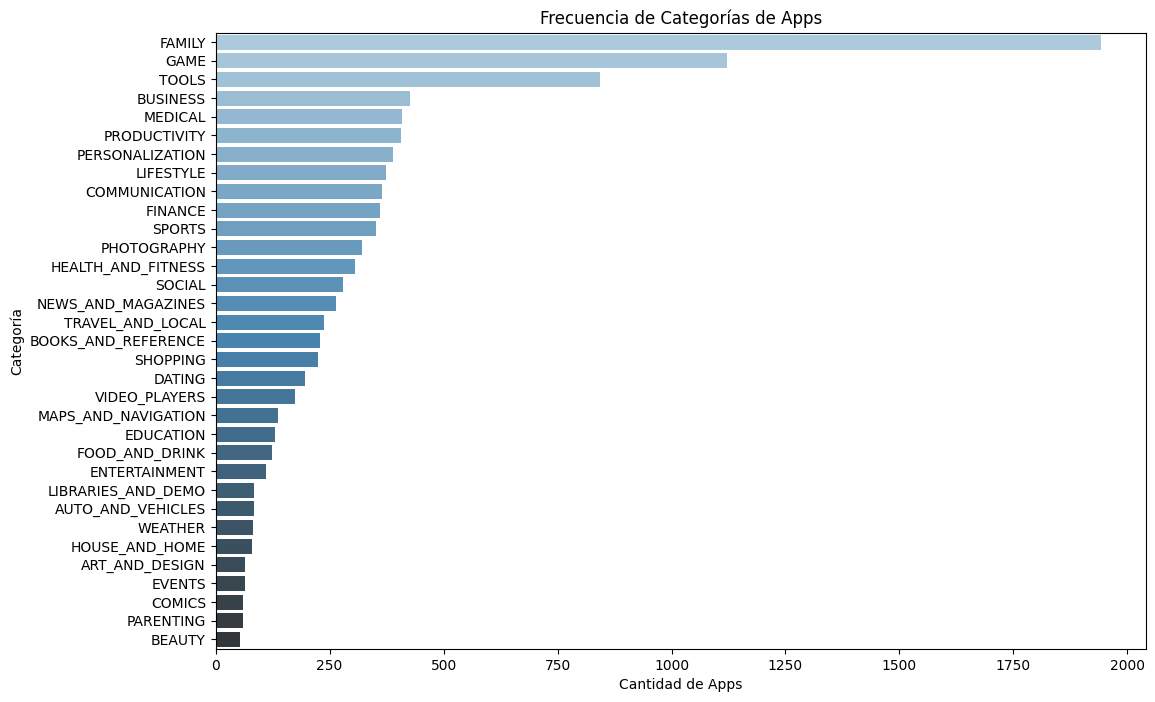

In [ ]:
# Contar la frecuencia de cada categoría
category_counts = df_apps['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Category', data=category_counts, hue='Category', palette='Blues_d', legend=False)

# Etiquetas y título
plt.title('Frecuencia de Categorías de Apps')
plt.xlabel('Cantidad de Apps')
plt.ylabel('Categoría')
plt.show()

✅ Cantidad de descargas según Categorías de las Apps

El gráfico nos indica que la categoría que más cantidad de Apps posee es Family, seguido de Game y de Tools. Por otro lado las categorías Comics y Beauty son las dos que menos cantidad de Apps poseen
Las categorías con mayor cantidad de Apps representan un mercado más grande y competitivo, mientras que las categorías con menos cantidad pueden representar nichos más específicos con menos competencia, pero también con un público más limitado. Dependiendo del objetivo, tanto la saturación como la especialización ofrecen oportunidades distintas para el desarrollo y el marketing de aplicaciones.

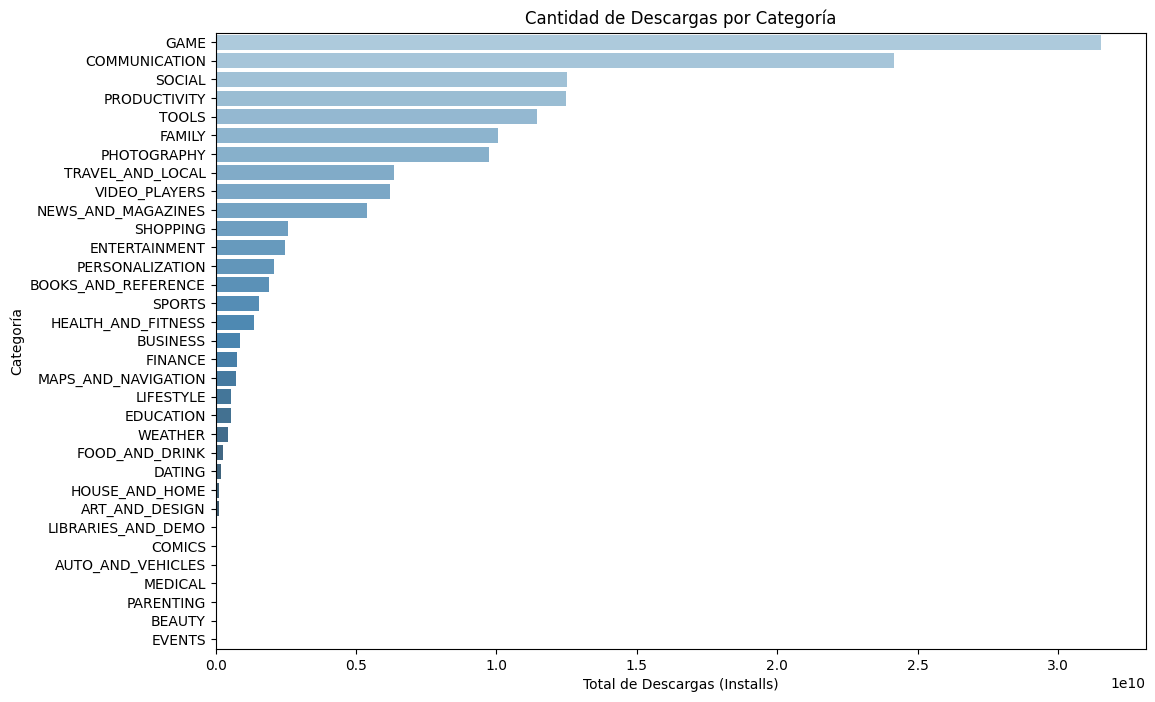

In [ ]:
# Sumar la cantidad de instalaciones por categoría
category_installs = df_apps.groupby('Category')['Installs'].sum().reset_index()

# Ordenar de mayor a menor cantidad de instalaciones
category_installs = category_installs.sort_values(by='Installs', ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Installs', y='Category', data=category_installs, hue='Category', palette='Blues_d', legend=False)

# Etiquetas y título
plt.title('Cantidad de Descargas por Categoría')
plt.xlabel('Total de Descargas (Installs)')
plt.ylabel('Categoría')
plt.show()

El gráfico nos muestra que las categoría con más descargas son: Game, Communication, Social. Esto es realmente muy interesante ya que aquí existen Categorías (como Communication y Social) que no se encuentran entre los primeros lugares cuando se observa la cantidad de Apps por categoría (ver gráfico anterior a este). Esto permitiría arribar a algunas conclusiones: **El hecho de que algunas categorías que tenían muchas apps no sean las más descargadas sugiere que tener más aplicaciones en una categoría no garantiza más descargas. En cambio, el éxito de una categoría parece estar más relacionado con el valor que ofrecen las aplicaciones más populares dentro de ella**. Ejemplo: Si la categoría "Social" tiene pocas apps pero muchas descargas, significa que aplicaciones como Facebook, Instagram o WhatsApp dominan el mercado y tienen millones de usuarios.

Una categoría con muchas apps pero pocas descargas totales podría indicar que hay una gran oferta, pero la demanda no es tan alta (o que la mayoría de las apps no son muy populares).
Una categoría con pocas apps pero muchas descargas sugiere que hay algunas apps "dominantes" que concentran la mayoría de los usuarios.

De esta forma contestamos una **pregunta de interés** planteada al comienzo de este trabajo: **¿Cuáles son las categorías más populares según el número de descargas?** La respuesta es: Las categorías Game, Communication y Social. ✅

✅ Distribución de Ratings de las Apps

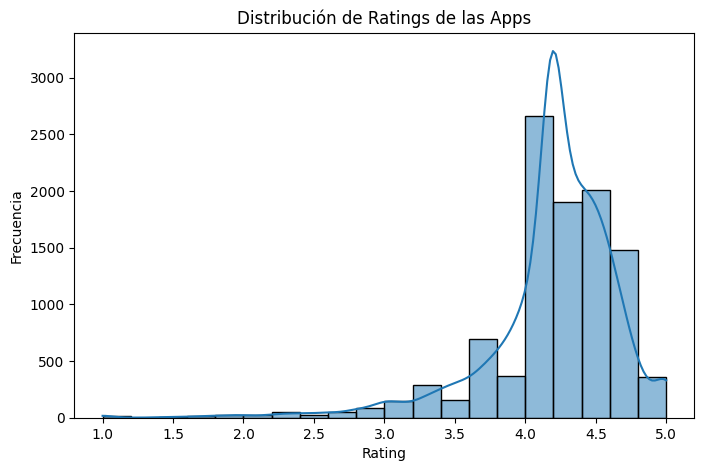

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_apps["Rating"], bins=20, kde=True)
plt.title("Distribución de Ratings de las Apps")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

El gráfico muestra que en general los usuarios de las Apps de Play Store están conformes con las Apps que han descargado, ya que la mayoría de las Apps poseen promedios de calificaciones por encima de 4 puntos sobre un máximo de 5.

✅ Boxplot de Ratings (Detección de Outliers)

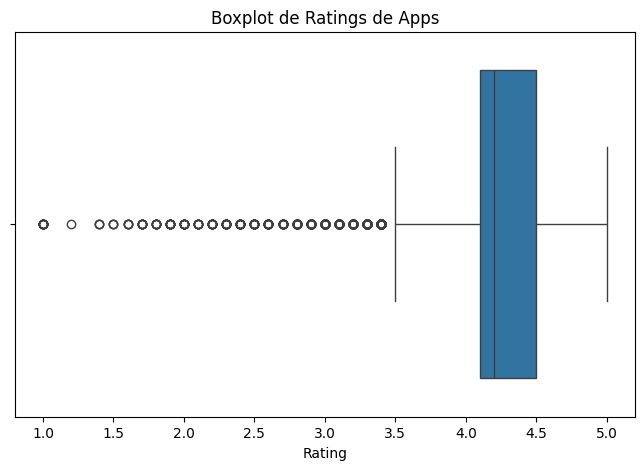

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_apps["Rating"])
plt.title("Boxplot de Ratings de Apps")
plt.show()

Este gráfico tipo Boxplot (o diagrama de cajas y bigotes) muestra que la mayoría de las calificaciones promedio de las Apps se encuentran entre 4 y 4,5 puntos sobre el máximo de 5. Los puntos fuera de los bigotes del gráficos son los denominados "outliers" (valores atípicos) y son, en este caso, valor extremadamente pequeños en comparación con la distribución general, sin embargo son valores reales y deben ser tenidos en cuenta.

✅ Distribución del Tamaño de las Apps (Size)

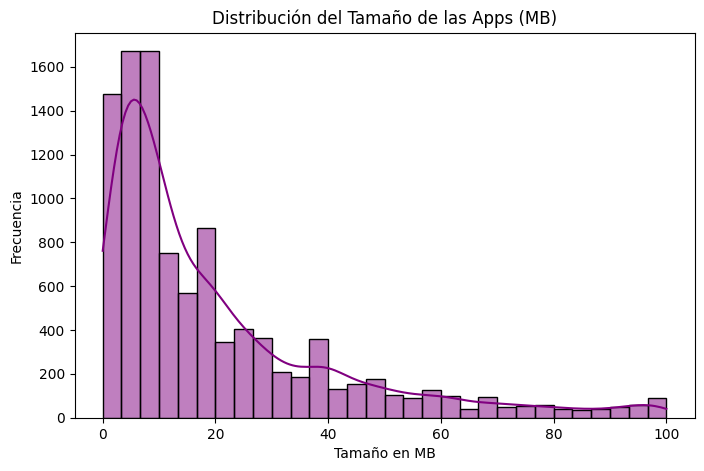

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_apps["Size"], bins=30, kde=True, color="purple")
plt.title("Distribución del Tamaño de las Apps (MB)")
plt.xlabel("Tamaño en MB")
plt.ylabel("Frecuencia")
plt.show()

El gráfico muestra que la mayoría de las Apps tienen un tamaño de hasta 20 Mb. Siguiendo un patrón de tendencia negativa en la que cuanto más pesa la App menos cantidad hay (con excepciones que pueden observarse en la curvatura de la línea).

✅ Distribución de Descargas (Installs)

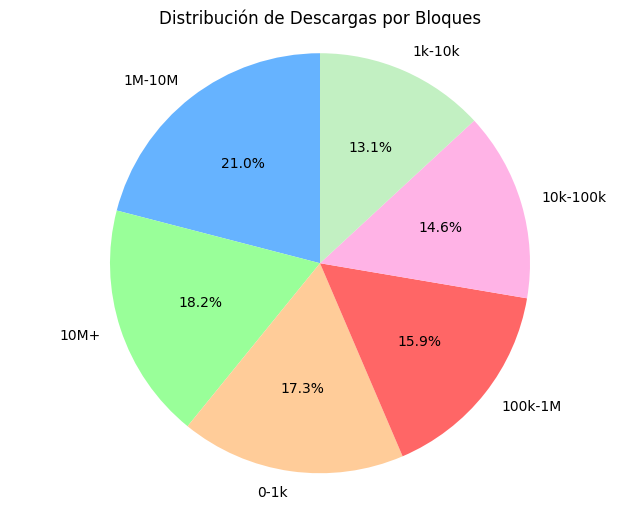

In [ ]:
# Contar la frecuencia de cada bloque
frequencies = df_apps['Installs_binned'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(frequencies, labels=frequencies.index, autopct='%1.1f%%', startangle=90,
        colors=['#66b3ff','#99ff99','#ffcc99','#ff6666', '#ffb3e6', '#c2f0c2'])
plt.title('Distribución de Descargas por Bloques')
plt.axis('equal')  # Para que el gráfico de torta sea un círculo
plt.show()

In [ ]:
# Definir el orden deseado de los bloques
ordered_bins = ['0-1k', '1k-10k', '10k-100k', '100k-1M', '1M-10M', '10M+']

# Asegurarnos de que 'installs_binned' tenga los bloques en el orden correcto
df_apps['Installs_binned'] = pd.Categorical(df_apps['Installs_binned'], categories=ordered_bins, ordered=True)

# Contar la frecuencia de cada bloque
frequency = df_apps['Installs_binned'].value_counts().sort_index()

# Calcular el porcentaje de cada frecuencia
percentage = (frequency / frequency.sum()) * 100

# Crear la tabla con las frecuencias y porcentajes
table = pd.DataFrame({
    'Frecuencia': frequency,
    'Porcentaje': percentage.round(2)
})

# Mostrar la tabla
table

,Frecuencia,Porcentaje
Installs_binned,,
0-1k,1791,17.29
1k-10k,1359,13.12
10k-100k,1507,14.55
100k-1M,1646,15.89
1M-10M,2171,20.96
10M+,1883,18.18


Observando el gráfico anterior y más claramente en la tabla precedente, es posible afirmar que 4054 Apps (2171 + 1883) poseen más de un millón de descargas, lo que representa el 39,14% del total de nuestro dataset. De esta forma contestamos a la **pregunta de interés: ¿Cuántas Apps tienen más de 1 millón de descargas?** La respuesta es, entonces, 4054 Apps.

✅ Proporción de Apps Gratuitas vs. Pagas

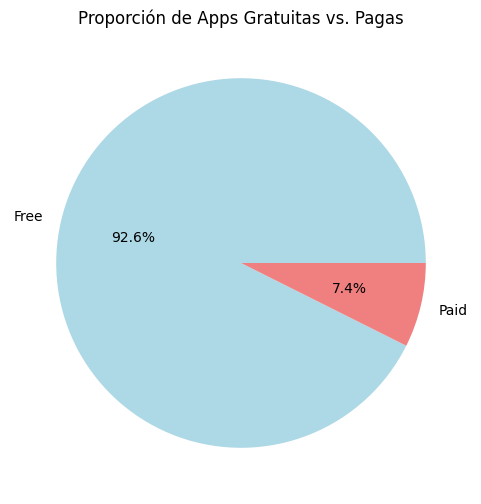

In [ ]:
plt.figure(figsize=(6, 6))
df_apps["Type"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "lightcoral"])
plt.title("Proporción de Apps Gratuitas vs. Pagas")
plt.ylabel("")
plt.show()

El gráfico nos muestra que la gran mayoría de las Apps del dataset son gratuitas, de esta forma se contesta a otra de las **preguntas de interés: ¿Qué porcentaje del total de Apps son gratuitas?** La respuesta es: un 92,6%. ✅

✅ Cantidad de Apps por Intervalo de Precios

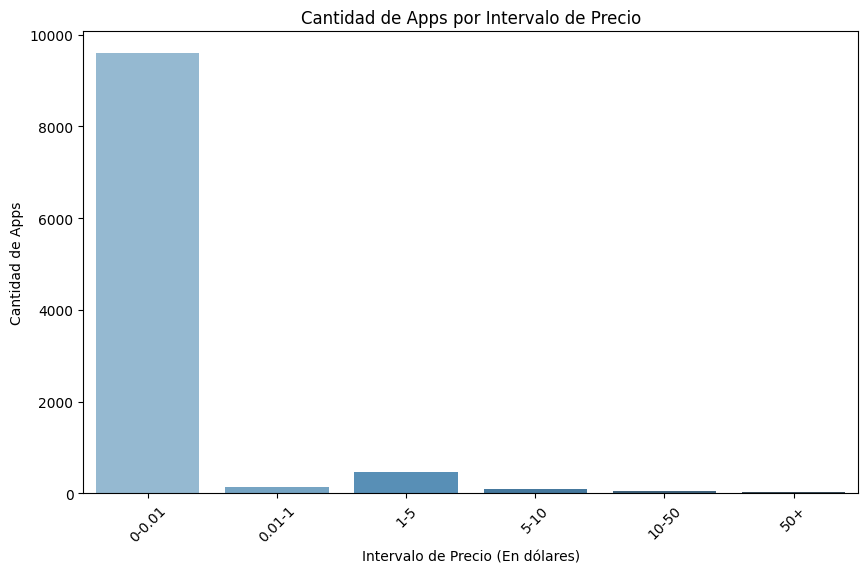

In [ ]:
# Contar la frecuencia de cada intervalo de precio
price_counts = df_apps['Price_binned'].value_counts().reset_index()
price_counts.columns = ['Price_binned', 'Count']

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Price_binned', y='Count', data=price_counts, hue='Price_binned', palette='Blues_d', legend=False)

# Etiquetas y título
plt.title('Cantidad de Apps por Intervalo de Precio')
plt.xlabel('Intervalo de Precio (En dólares)')
plt.ylabel('Cantidad de Apps')
plt.xticks(rotation=45)  # Rotar las etiquetas en el eje x
plt.show()

Para verlo mejor quitemos por un momento las Apps gratuitas de nuestro gráfico:

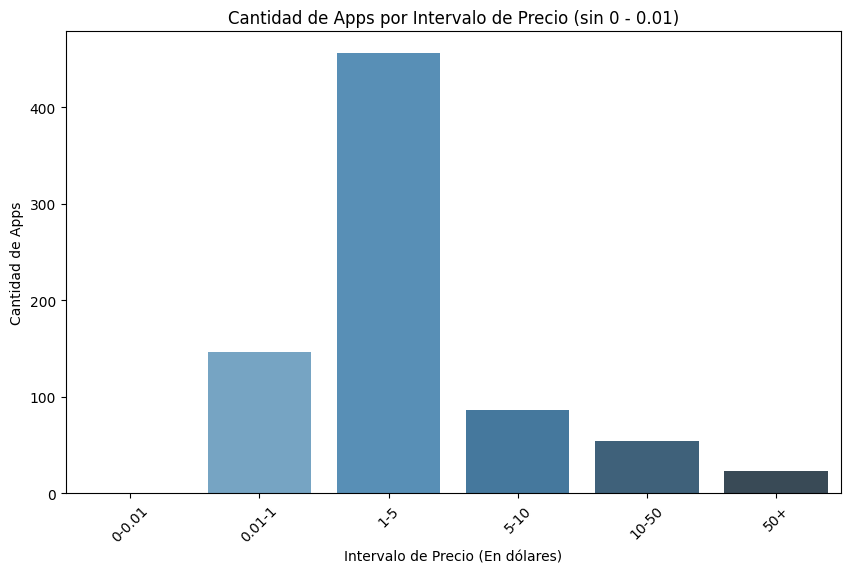

In [ ]:
# Filtrar el intervalo (0-0.01)
price_counts_filtrado = df_apps[df_apps['Price_binned'] != '0-0.01']['Price_binned'].value_counts().reset_index()
price_counts_filtrado.columns = ['Price_binned', 'Count']

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Price_binned', y='Count', data=price_counts_filtrado, hue='Price_binned', palette='Blues_d', legend=False)

# Etiquetas y título
plt.title('Cantidad de Apps por Intervalo de Precio (sin 0 - 0.01)')
plt.xlabel('Intervalo de Precio (En dólares)')
plt.ylabel('Cantidad de Apps')
plt.xticks(rotation=45)  # Rotar las etiquetas en el eje x
plt.show()

En los dos gráficos anteriores se muestra la cantidad de aplicaciones por intervalo de precio. En el primero se incluyen tanto las aplicaciones gratuitas como las de pago, mientras que en el segundo se ha eliminado la barra correspondiente a las apps sin costo. Esto permite visualizar con mayor detalle la distribución de las aplicaciones pagas en cada rango de precio.

Si bien inicialmente se observa un comportamiento inverso, en general, existe una tendencia clara: a medida que el precio aumenta, la cantidad de aplicaciones disponibles disminuye.

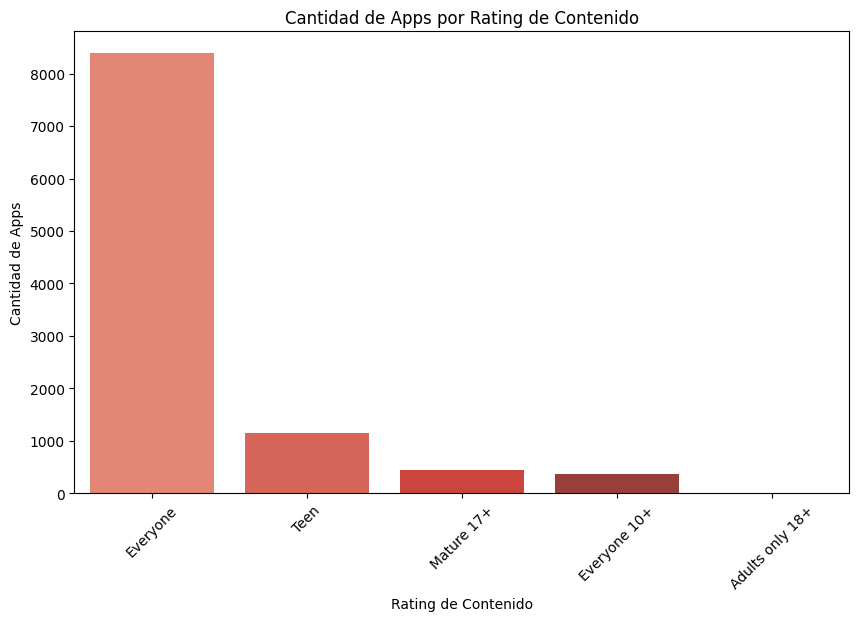

In [ ]:
# Contar la frecuencia de cada categoría de 'Content Rating'
content_rating_counts = df_apps['Content Rating'].value_counts().reset_index()
content_rating_counts.columns = ['Content Rating', 'Count']

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Content Rating', y='Count', data=content_rating_counts, hue='Content Rating', palette='Reds_d', legend=False)

# Etiquetas y título
plt.title('Cantidad de Apps por Rating de Contenido')
plt.xlabel('Rating de Contenido')
plt.ylabel('Cantidad de Apps')
plt.xticks(rotation=45)  # Rotar las etiquetas en el eje x
plt.show()

El gráfico muestra la cantidad de Apps que existen de acuerdo a las restricciones de edad. La gran mayoría es apta para todos los usuarios, es decir, de cualquier edad.

📌 2. Gráficos Bivariables

✅ Matriz de Correlación

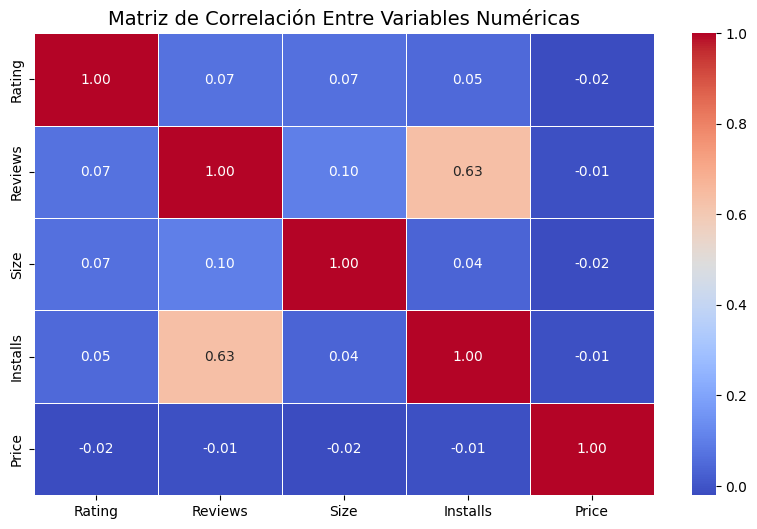

In [ ]:
# Filtrar solo las columnas numéricas
df_corr = df_apps.select_dtypes(include=["number"])

# Crear la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación Entre Variables Numéricas", fontsize=14)
plt.show()

La **matriz de correlación** es una herramienta clave para identificar relaciones positivas o negativas entre variables numéricas. En este caso, observamos que la relación más fuerte se da entre las variables "Installs" y "Reviews", con un coeficiente de correlación de 0.64.

Si bien este valor no indica una relación perfectamente lineal, sí sugiere una asociación significativa: **a medida que aumenta la cantidad de instalaciones (Installs), también tiende a aumentar la cantidad de reseñas (Reviews)**. Esto es lógico, ya que una mayor base de usuarios suele generar más interacciones y retroalimentación en forma de comentarios y calificaciones.

✅ Relación entre Descargas (Installs) y Ratings

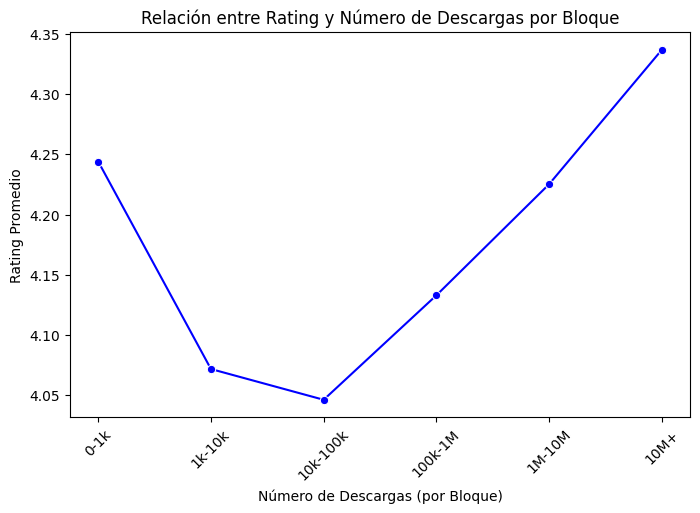

In [ ]:
# Agrupar por bloque de instalaciones y calcular el promedio de rating
rating_by_installs = df_apps.groupby('Installs_binned', observed=False)['Rating'].mean().reset_index()

# Crear el gráfico de línea
plt.figure(figsize=(8, 5))
sns.lineplot(x='Installs_binned', y='Rating', data=rating_by_installs, marker='o', color='b')
plt.title('Relación entre Rating y Número de Descargas por Bloque')
plt.xlabel('Número de Descargas (por Bloque)')
plt.ylabel('Rating Promedio')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X
plt.show()

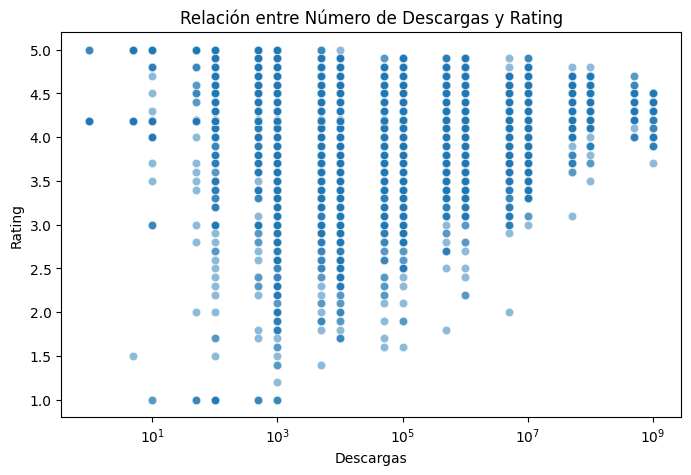

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_apps["Installs"], y=df_apps["Rating"], alpha=0.5)
plt.xscale("log")
plt.title("Relación entre Número de Descargas y Rating")
plt.xlabel("Descargas")
plt.ylabel("Rating")
plt.show()

Los gráficos anteriores muestran que la relación entre rating y cantidad de descargas no es lineal, sino que sigue un comportamiento curvo. Inicialmente, a medida que las aplicaciones acumulan más descargas, su calificación tiende a disminuir. Sin embargo, a partir de un umbral aproximado de 100.000 descargas, la tendencia se revierte y el rating comienza a aumentar conforme crece la cantidad de descargas.

Este patrón podría indicar que las aplicaciones con pocas descargas suelen recibir calificaciones más altas debido a un público inicial más reducido y posiblemente sesgado. En cambio, las apps con una base de usuarios mucho mayor pueden haber pasado por múltiples actualizaciones y mejoras, lo que, con el tiempo, contribuye a una mejor valoración general.

Estos datos permiten constestar a otra **pregunta de interés** incialmente planteada: **¿Las Apps más descargadas poseen mejores calificaciones?**. La respuesta es sí, a partir de las 100 mil descargas cuanto mayor es la cantidad de descargas de la App mejor calificación posee. ✅

✅ Relación entre Descargas (Installs) y Reviews

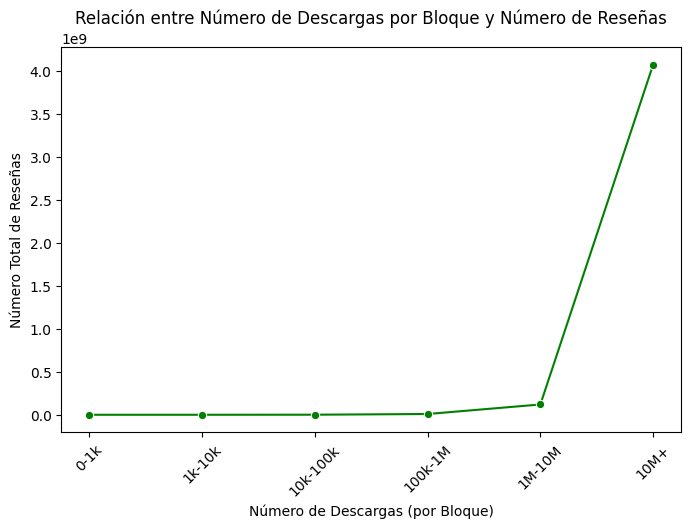

In [ ]:
# Agrupar por bloque de instalaciones y calcular la suma de reseñas
reviews_by_installs = df_apps.groupby('Installs_binned', observed=False)['Reviews'].sum().reset_index()

# Crear el gráfico de línea
plt.figure(figsize=(8, 5))
sns.lineplot(x='Installs_binned', y='Reviews', data=reviews_by_installs, marker='o', color='g')
plt.title('Relación entre Número de Descargas por Bloque y Número de Reseñas')
plt.xlabel('Número de Descargas (por Bloque)')
plt.ylabel('Número Total de Reseñas')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X
plt.show()

Se deja afuera del análisis los últimos dos bloques (para que no distorcione la interpretación del gráfico):

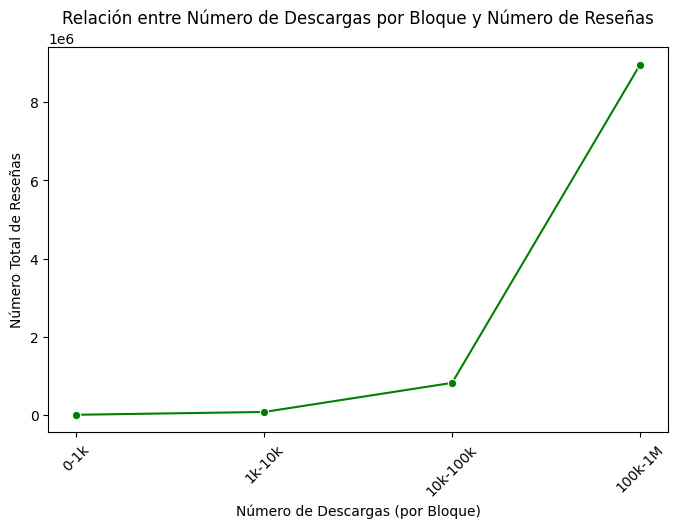

In [ ]:
# Agrupar por bloque de instalaciones y calcular la suma de reseñas
reviews_by_installs = df_apps.groupby('Installs_binned', observed=False)['Reviews'].sum().reset_index()

# Eliminar los dos últimos bloques de descargas
reviews_by_installs = reviews_by_installs[~reviews_by_installs['Installs_binned'].isin(['10M+', '1M-10M'])]

# Crear el gráfico de línea
plt.figure(figsize=(8, 5))
sns.lineplot(x='Installs_binned', y='Reviews', data=reviews_by_installs, marker='o', color='g')
plt.title('Relación entre Número de Descargas por Bloque y Número de Reseñas')
plt.xlabel('Número de Descargas (por Bloque)')
plt.ylabel('Número Total de Reseñas')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X
plt.show()

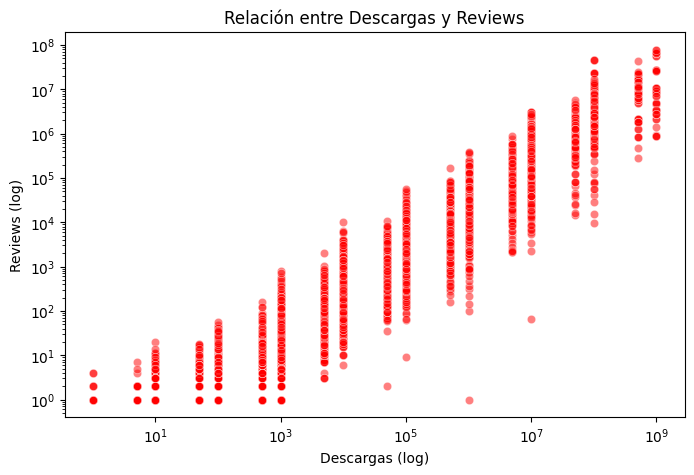

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_apps["Installs"], y=df_apps["Reviews"], alpha=0.5, color="red")
plt.xscale("log")
plt.yscale("log")
plt.title("Relación entre Descargas y Reviews")
plt.xlabel("Descargas (log)")
plt.ylabel("Reviews (log)")
plt.show()

Los gráficos anteriores refuerzan la conclusión que ya habíamos anticipado al analizar la matriz de correlación: **existe una relación directa y significativa entre la cantidad de descargas y el número de reseñas que reciben las aplicaciones**.

Este comportamiento es esperable, ya que a medida que una app alcanza un mayor número de usuarios, también aumenta la probabilidad de que estos dejen una reseña. Sin embargo, este vínculo podría no ser estrictamente proporcional, ya que otros factores, como la satisfacción del usuario, la funcionalidad de la app o estrategias de incentivo para dejar comentarios, también pueden influir en la cantidad de reseñas recibidas.

✅ Relación entre Reviews y Rating

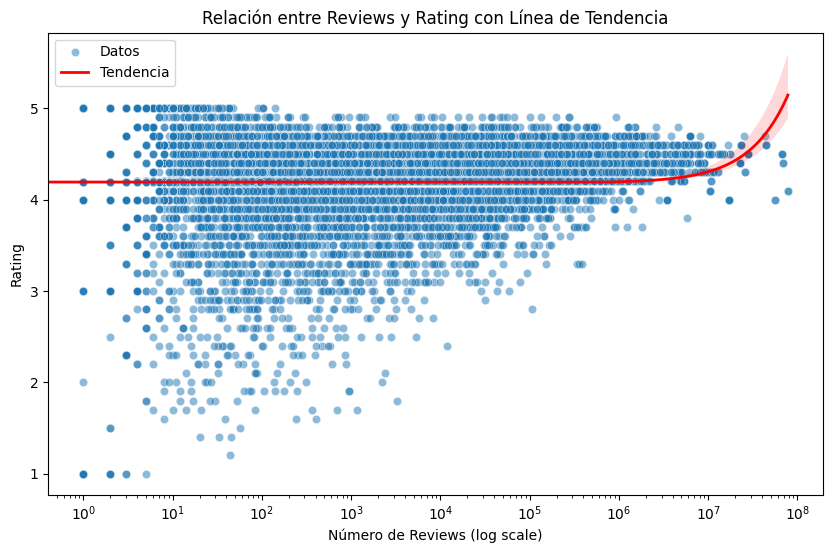

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=df_apps["Reviews"], y=df_apps["Rating"], alpha=0.5, label="Datos")
sns.regplot(x=df_apps["Reviews"], y=df_apps["Rating"], scatter=False, color="red", line_kws={"linewidth":2}, label="Tendencia")

plt.xscale("log")  # Escala logarítmica para mejor visualización
plt.xlabel("Número de Reviews (log scale)")
plt.ylabel("Rating")
plt.title("Relación entre Reviews y Rating con Línea de Tendencia")
plt.legend()

plt.show()

Este gráfico indica que, en general, la calificación de las aplicaciones parece permanecer relativamente constante independientemente de las variaciones en la cantidad de reseñas. Sin embargo, a medida que la cantidad de reseñas aumenta significativamente, se observa un incremento en las calificaciones, lo que sugiere que las aplicaciones con una base más amplia de usuarios tienden a recibir valoraciones más altas conforme aumenta la interacción de los usuarios.

✅ Precio Promedio de las Apps por cada Intervalo de Descarga

In [ ]:
# Calcular el precio promedio por cada bloque de instalaciones
price_avg_by_bin = df_apps.groupby('Installs_binned', observed=True)['Price'].mean()

# Ver los resultados
price_avg_by_bin

,Price
Installs_binned,
0-1k,1.65
1k-10k,2.83
10k-100k,1.97
100k-1M,0.52
1M-10M,0.03
10M+,0.01


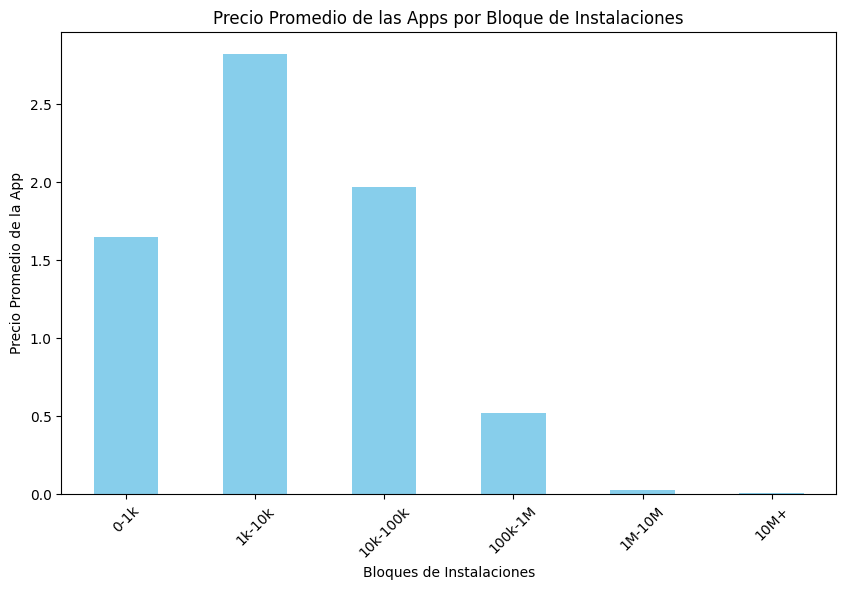

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
price_avg_by_bin.plot(kind='bar', color='skyblue')

# Etiquetas y título
plt.title('Precio Promedio de las Apps por Bloque de Instalaciones')
plt.xlabel('Bloques de Instalaciones')
plt.ylabel('Precio Promedio de la App')
plt.xticks(rotation=45)  # Para que las etiquetas de los bloques se vean bien

# Mostrar el gráfico
plt.show()

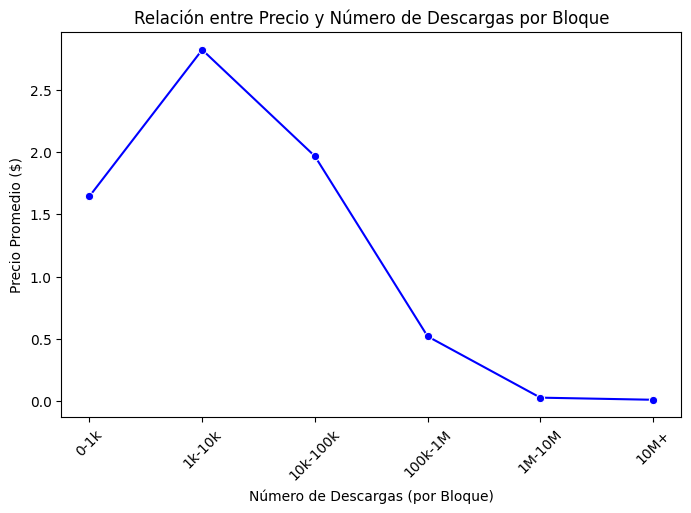

In [ ]:
# Agrupar por bloque de instalaciones y calcular el precio promedio
price_by_installs = df_apps.groupby('Installs_binned', observed=False)['Price'].mean().reset_index()

# Eliminar los dos últimos bloques de descargas
price_by_installs = price_by_installs[~price_by_installs['Installs_binned'].str.contains('10\+|50\+')]

# Crear el gráfico de línea
plt.figure(figsize=(8, 5))
sns.lineplot(x='Installs_binned', y='Price', data=price_by_installs, marker='o', color='b')
plt.title('Relación entre Precio y Número de Descargas por Bloque')
plt.xlabel('Número de Descargas (por Bloque)')
plt.ylabel('Precio Promedio ($)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X
plt.show()

In [ ]:
# Aplicar la escala logarítmica
df_apps['log_price'] = np.log1p(df_apps['Price'])  # np.log1p para evitar log(0)
df_apps['log_installs'] = np.log1p(df_apps['Installs'])

# Calcular la nueva correlación
correlation = df_apps[['log_price', 'log_installs']].corr()
print(correlation)

              log_price  log_installs
log_price          1.00         -0.20
log_installs      -0.20          1.00


Los gráficos muestran una clara tendencia: **a medida que el precio de las aplicaciones disminuye, la cantidad de descargas aumenta**. Este patrón refleja una preferencia generalizada por parte de los usuarios hacia las aplicaciones gratuitas o de bajo costo. Una posible explicación de este comportamiento es que los usuarios suelen ser más reacios a pagar por una app sin antes probarla. Las aplicaciones gratuitas o de bajo precio reducen el riesgo percibido, ya que los usuarios sienten que su inversión es mínima en comparación con el valor que pueden obtener. Además, en un mercado saturado de opciones, las apps con precios bajos o gratuitas se destacan y pueden captar una mayor base de usuarios. Esta tendencia también puede estar influenciada por la creciente preferencia por modelos de negocio freemium, donde las apps gratuitas ofrecen funcionalidades básicas mientras que las características premium se pagan, lo que puede atraer a más usuarios inicialmente.

✅ Comparación de Apps Gratuitas vs. Pagas en Descargas

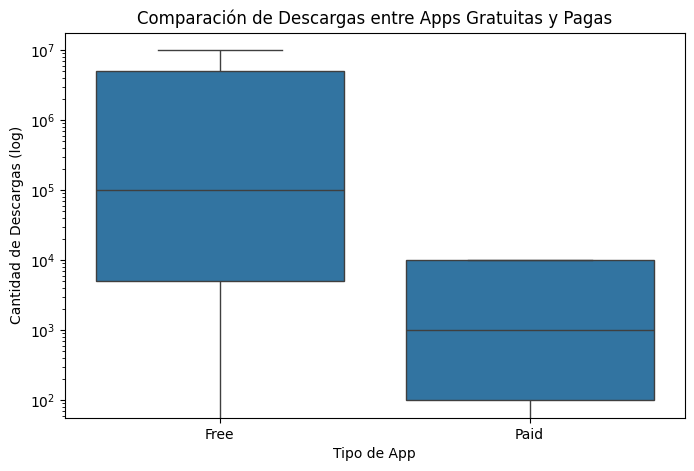

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_apps["Type"], y=df_apps["Installs"], showfliers=False)
plt.yscale("log")
plt.title("Comparación de Descargas entre Apps Gratuitas y Pagas")
plt.xlabel("Tipo de App")
plt.ylabel("Cantidad de Descargas (log)")
plt.show()

Promedio de descargas por tipo de aplicación:
   Type  Average_Installs
0  Free       15279679.80
1  Paid          90491.35


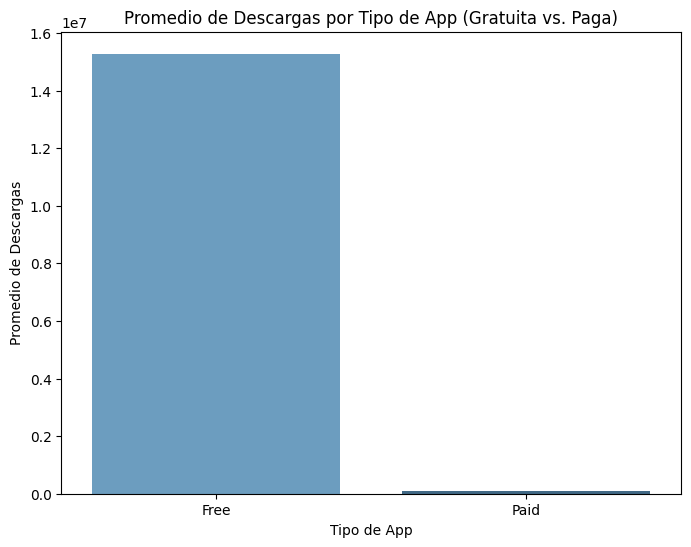

In [ ]:
# Calcular el promedio de descargas para aplicaciones gratuitas y pagas
avg_installs = df_apps.groupby('Type')['Installs'].mean().reset_index()

# Renombrar las columnas para mayor claridad
avg_installs.columns = ['Type', 'Average_Installs']

# Mostrar los promedios antes de graficar
print("Promedio de descargas por tipo de aplicación:")
print(avg_installs)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Type', y='Average_Installs', data=avg_installs, hue='Type', palette='Blues_d', legend=False)

# Etiquetas y título
plt.title('Promedio de Descargas por Tipo de App (Gratuita vs. Paga)')
plt.xlabel('Tipo de App')
plt.ylabel('Promedio de Descargas')
plt.show()

Como se confirmó en el análisis previo de los gráficos, **se observa una preferencia clara por parte de los usuarios por las aplicaciones gratuitas en comparación con las de pago, especialmente en términos de cantidad de descargas**. Esto resalta la tendencia de los usuarios a optar por opciones sin costo, lo que puede estar relacionado con la percepción de menor riesgo al no tener que realizar una inversión inicial.

✅ Comparación de Apps Gratuitas vs. Pagas en Rating

Promedios de Rating por Tipo de App:
   Type  Average_Rating
0  Free            4.18
1  Paid            4.25


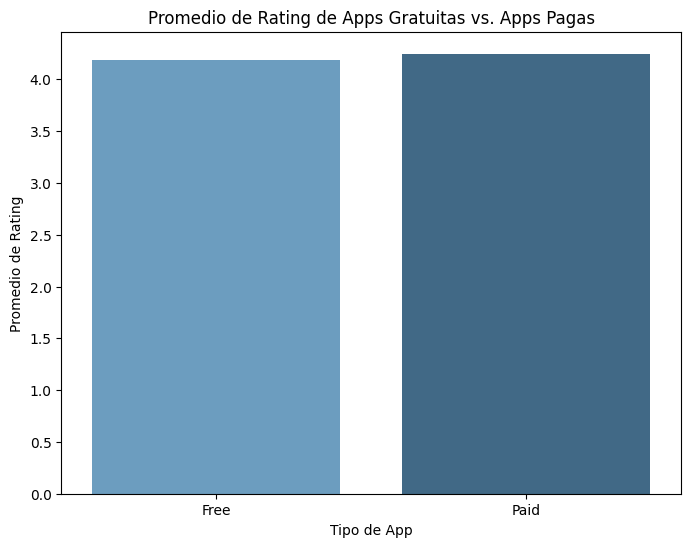

In [ ]:
# Calcular el promedio de rating para aplicaciones gratuitas y pagas
avg_ratings = df_apps.groupby('Type')['Rating'].mean().reset_index()

# Renombrar las columnas para mayor claridad
avg_ratings.columns = ['Type', 'Average_Rating']

# Mostrar los promedios antes de graficar
print("Promedios de Rating por Tipo de App:")
print(avg_ratings)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Type', y='Average_Rating', data=avg_ratings, hue='Type', palette='Blues_d', legend=False)

# Etiquetas y título
plt.title('Promedio de Rating de Apps Gratuitas vs. Apps Pagas')
plt.xlabel('Tipo de App')
plt.ylabel('Promedio de Rating')
plt.show()

Con base en lo observado, podemos concluir que las aplicaciones de pago tienden a tener mejores calificaciones que las gratuitas. Este hallazgo responde a una de las **preguntas clave** de nuestro análisis: **¿Las apps pagas tienen mejor calificación que las gratuitas?** La respuesta es sí. ✅

Una posible explicación para este resultado es que las aplicaciones de pago suelen estar más cuidadas en cuanto a desarrollo, soporte y actualizaciones, dado que los desarrolladores invierten más recursos para asegurar una experiencia de usuario de calidad. Además, las aplicaciones pagas suelen atraer a un público más comprometido y dispuesto a pagar por un servicio de calidad, lo que podría llevar a calificaciones más altas. Por otro lado, las aplicaciones gratuitas pueden estar más influenciadas por un público más amplio, con expectativas diversas y, en ocasiones, menores incentivos para dejar reseñas positivas.

✅ Relación entre el Tamaño de la App y el número de Descargas por Intervalo

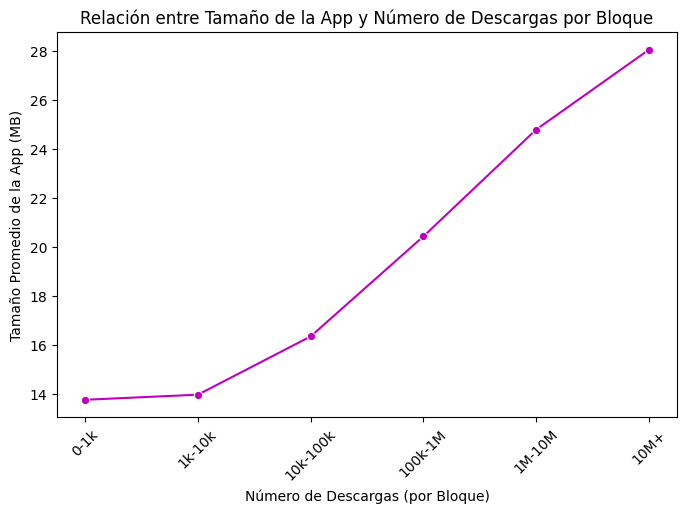

In [ ]:
# Agrupar por bloque de instalaciones y calcular el tamaño promedio
size_by_installs = df_apps.groupby('Installs_binned', observed=False)['Size'].mean().reset_index()

# Eliminar los dos últimos bloques de descargas
size_by_installs = size_by_installs[~size_by_installs['Installs_binned'].str.contains('10\+|50\+')]

# Crear el gráfico de línea
plt.figure(figsize=(8, 5))
sns.lineplot(x='Installs_binned', y='Size', data=size_by_installs, marker='o', color='m')
plt.title('Relación entre Tamaño de la App y Número de Descargas por Bloque')
plt.xlabel('Número de Descargas (por Bloque)')
plt.ylabel('Tamaño Promedio de la App (MB)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X
plt.show()

El gráfico muestra como existe una relación tal que **cuanto más alto es el tamaño de las Apps (en promedio) más alto es la cantidad de descargas**. Este patrón podría explicarse por el hecho de que las aplicaciones más grandes suelen ofrecer funcionalidades más completas o mejor calidad en términos de contenido y características, lo que atrae a un mayor número de usuarios. Además, las aplicaciones más grandes a menudo incluyen una mejor optimización para diferentes dispositivos y pueden incluir actualizaciones regulares, lo que también puede generar una mayor confianza y preferencia entre los usuarios.

Estos datos, además, permiten contestar otra **pregunta de interés**: **¿Las Apps más grandes en tamaño tienen menos descargas?** La respuesta es: No, por el contrario cuanto más grande en tamaño es la App, más descargas posee.



✅ Relación entre el Rating y las Categorías de las Apps

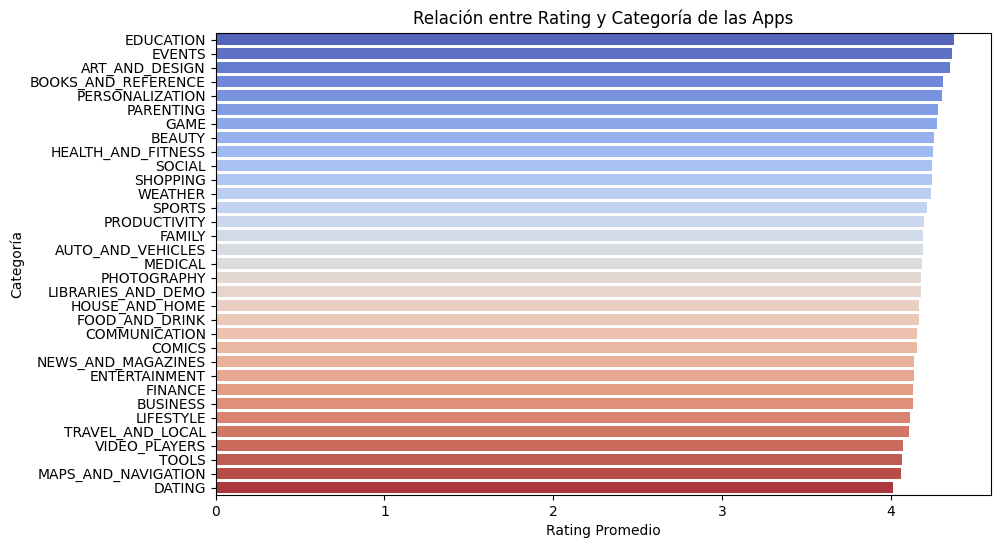

In [ ]:
# Calcular el rating promedio por categoría
rating_by_category = df_apps.groupby('Category', observed=False)['Rating'].mean().reset_index()

# Ordenar los datos por rating
rating_by_category = rating_by_category.sort_values(by='Rating', ascending=False)

# Crear el gráfico de barras con la corrección
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Category', data=rating_by_category, hue='Category', palette='coolwarm', legend=False)
plt.title('Relación entre Rating y Categoría de las Apps')
plt.xlabel('Rating Promedio')
plt.ylabel('Categoría')
plt.show()

El gráfico muestra que las categorías Education, Events y Art and Design son las que mejor valoración poseen por parte de los usuarios. Mientras que Dating, Maps and Navigation y Tools son las que menos calificación poseen (si bien el promedio para todas es superior a los 4 puntos sobre 5).

Este gráfico permite contestar otra de las **preguntas de interés**: **¿Cuál es la categoría de Apps que posee mejor calificación?** La respuesta es: La categoría Education. ✅

✅ Relación entre el Rating y el tipo de App según Restricciones de Edad en sus Usuarios

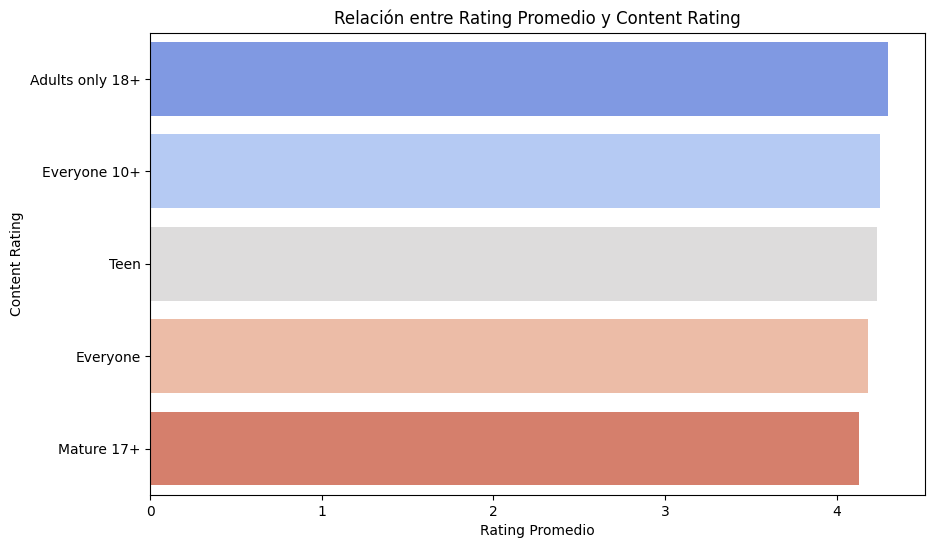

In [ ]:
# Calcular el rating promedio por Content Rating
rating_by_content = df_apps.groupby('Content Rating', observed=False)['Rating'].mean().reset_index()

# Ordenar los datos por rating (opcional)
rating_by_content = rating_by_content.sort_values(by='Rating', ascending=False)

# Crear el gráfico de barras con la corrección
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Content Rating', data=rating_by_content, hue='Content Rating', palette='coolwarm', legend=False)
plt.title('Relación entre Rating Promedio y Content Rating')
plt.xlabel('Rating Promedio')
plt.ylabel('Content Rating')
plt.show()

El gráfico revela que las aplicaciones con restricciones de edad que permiten su descarga solo a mayores de 18 años tienden a recibir mejores calificaciones. En contraste, aquellas dirigidas a mayores de 17 años presentan las valoraciones más bajas, aunque, al igual que en el gráfico anterior, el promedio general para todas las categorías sigue siendo superior a 4 sobre 5.

✅ Relación entre el Rating y sus Precios (por Intérvalos)

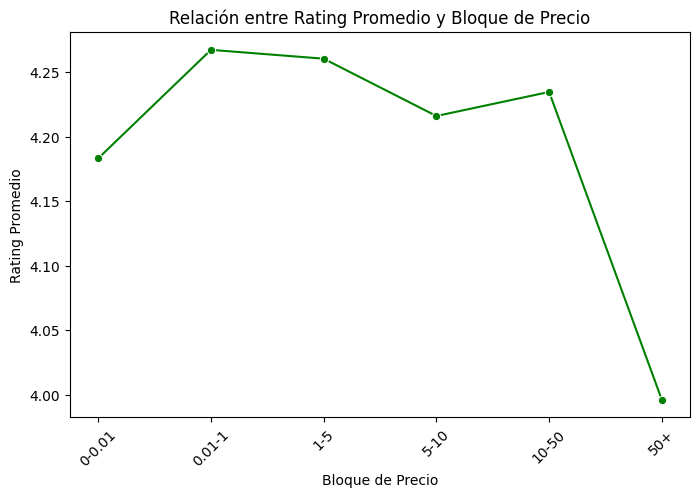

In [ ]:
# Calcular el rating promedio por bloque de precio
rating_by_price = df_apps.groupby('Price_binned', observed=False)['Rating'].mean().reset_index()

# Ordenar los datos por bloque de precio
rating_by_price = rating_by_price.sort_values(by='Price_binned')

# Crear el gráfico de línea
plt.figure(figsize=(8, 5))
sns.lineplot(x='Price_binned', y='Rating', data=rating_by_price, marker='o', color='g')
plt.title('Relación entre Rating Promedio y Bloque de Precio')
plt.xlabel('Bloque de Precio')
plt.ylabel('Rating Promedio')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X si es necesario
plt.show()

El gráfico muestra que la calificación de las Apps es menor cuanto más costosa es la App. Ahondaremos en este tema al momento de esbozar las conclusiones y análisis de la Hipótesis propuesta al inicio de este trabajo.

✅ Tamaños Promedio de Apps por Categoría

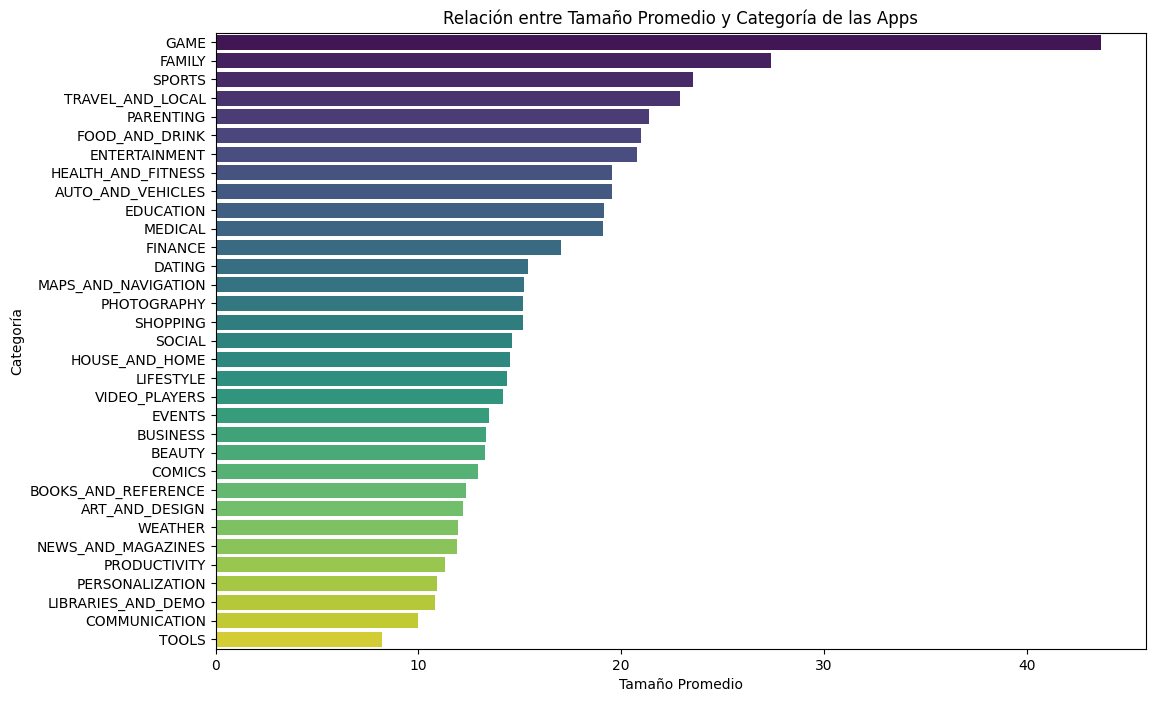

In [ ]:
# Calcular el tamaño promedio por categoría
size_by_category = df_apps.groupby('Category', observed=False)['Size'].mean().reset_index()

# Ordenar los datos por tamaño (opcional)
size_by_category = size_by_category.sort_values(by='Size', ascending=False)

# Crear el gráfico de barras con la corrección
plt.figure(figsize=(12, 8))
sns.barplot(x='Size', y='Category', data=size_by_category, hue='Category', palette='viridis', legend=False)
plt.title('Relación entre Tamaño Promedio y Categoría de las Apps')
plt.xlabel('Tamaño Promedio')
plt.ylabel('Categoría')
plt.show()

El gráfico revela que las categorías Game, Family y Sports presentan tamaños promedio de aplicaciones significativamente más grandes en comparación con otras categorías. Esto puede atribuirse a que las aplicaciones en estas categorías suelen ofrecer funcionalidades más complejas y gráficos de alta calidad, especialmente en el caso de las aplicaciones de juegos, que requieren mayor capacidad de almacenamiento para gráficos, niveles, datos de usuario y otros componentes interactivos. En el caso de las aplicaciones de Family y Sports, el tamaño más grande puede deberse a la inclusión de contenido multimedia, videos o datos de usuario almacenados localmente, lo que también requiere más espacio de almacenamiento.

Por otro lado, las categorías Communication y Tools tienen tamaños promedio más pequeños. Esto es comprensible ya que estas aplicaciones suelen centrarse en funcionalidades más ligeras y operaciones de datos más simples, como la mensajería o las herramientas básicas de productividad. Además, estas aplicaciones pueden aprovechar más las redes en la nube para almacenar datos, lo que reduce la necesidad de un gran espacio de almacenamiento local.

Este gráfico permite contestar a la **pregunta de interés**: **¿Qué categorías de Apps poseen mayor tamaño (en Mb)?** La respuesta es: La categoría Game. ✅

✅ Tamaño Promedio por Tipo de App (Gratuita o de Pago)

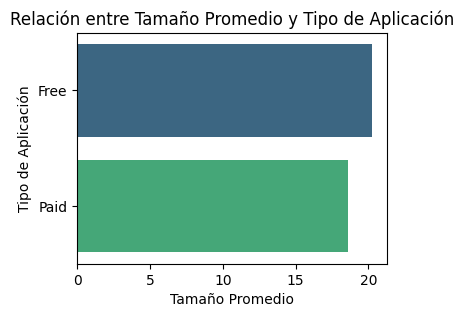

In [ ]:
# Calcular el tamaño promedio por tipo de aplicación
size_by_type = df_apps.groupby('Type', observed=False)['Size'].mean().reset_index()

# Ordenar los datos por tamaño (opcional)
size_by_type = size_by_type.sort_values(by='Size', ascending=False)

# Crear el gráfico de barras con la corrección
plt.figure(figsize=(4, 3))
sns.barplot(x='Size', y='Type', data=size_by_type, hue='Type', palette='viridis', legend=False)
plt.title('Relación entre Tamaño Promedio y Tipo de Aplicación')
plt.xlabel('Tamaño Promedio')
plt.ylabel('Tipo de Aplicación')
plt.show()

Este gráfico ilustra que las Apps gratuitas son ligeramente más grandes en tamaño (en promedio) que las pagas.

## **HIPÓTESIS: ¿Confirmación o Refutación?** 🧪

**"Las apps con precios más altos tienden a tener menos descargas, pero su rating promedio es más alto en comparación con las apps gratuitas."**

Llegamos al final y para responder a la pregunta si la hipótesis se confirma o se refuta lo primero que tenemos que hacer es determinar a qué llamamos "las apps con precios más altos". Luego de haber realizado un pormenorizado análisis de nuestro dataset podríamos considerar que **toda app cuyo valor sea igual o mayor a los 10 dólares** es considerada del grupo de **"las Apps con precios más altos"**.

Comencemos por analizar la primera parte de la hipótesis: **"Las apps con precios más altos tienden a tener menos descargas"**

### Realicemos y observemos algunos gráficos:

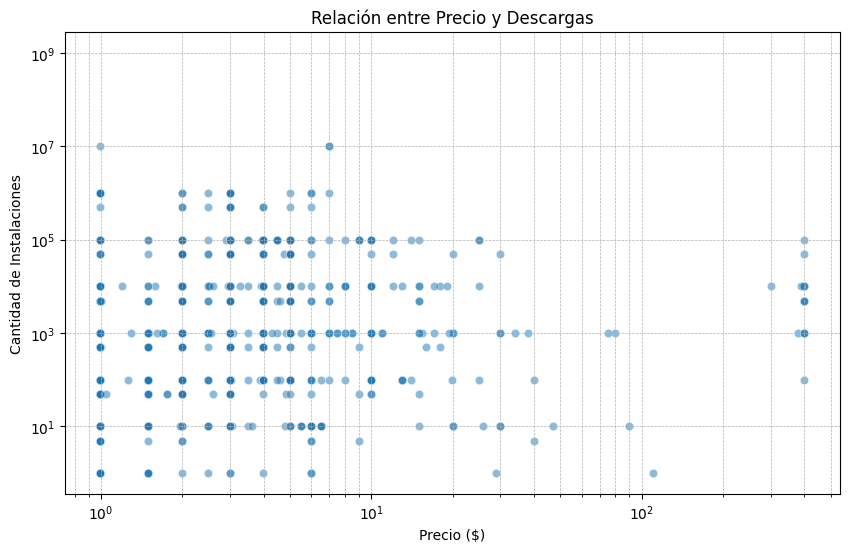

In [ ]:
# 1️⃣ Relación entre el precio y la cantidad de instalaciones
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_apps, x="Price", y="Installs", alpha=0.5)
plt.xscale("log")  # Escala logarítmica para mejor visualización
plt.yscale("log")
plt.xlabel("Precio ($)")
plt.ylabel("Cantidad de Instalaciones")
plt.title("Relación entre Precio y Descargas")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

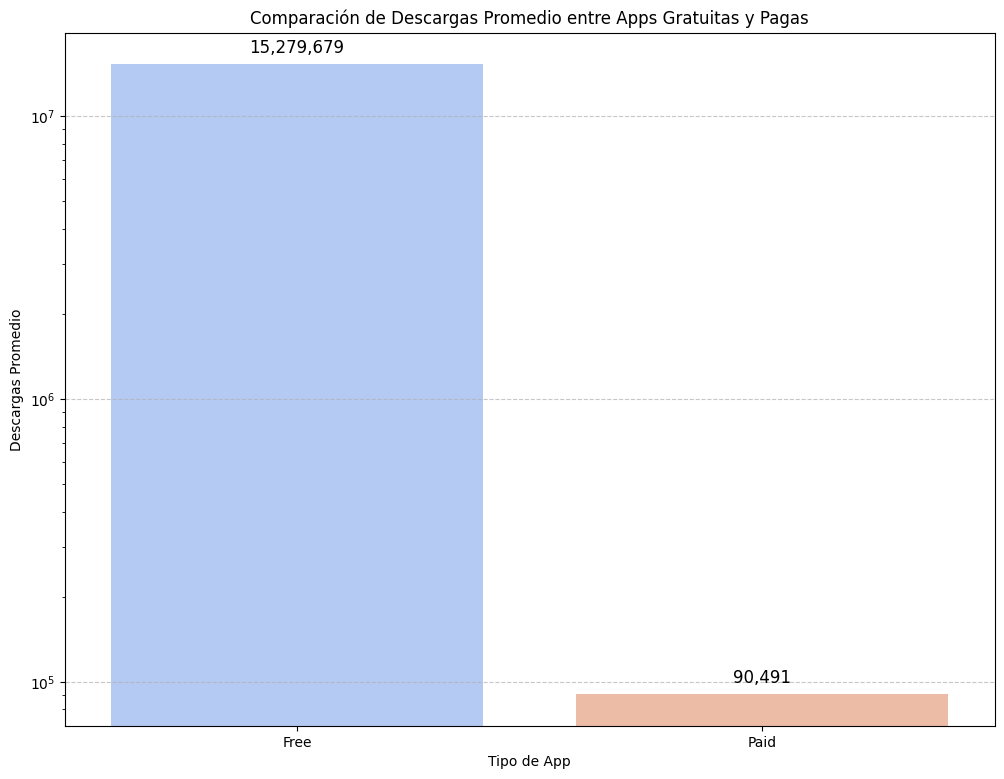

In [ ]:
# Calcular el promedio de instalaciones según el tipo de app
promedio_installs = df_apps.groupby("Type")["Installs"].mean()

# Crear el gráfico de barras
plt.figure(figsize=(12, 9))
sns.barplot(x=promedio_installs.index, y=promedio_installs.values, hue=promedio_installs.index, palette="coolwarm", legend=False)

# Etiquetas y título
plt.xlabel("Tipo de App")
plt.ylabel("Descargas Promedio")
plt.title("Comparación de Descargas Promedio entre Apps Gratuitas y Pagas")
plt.yscale("log")  # Escala logarítmica para mejor visualización si hay mucha diferencia
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Agregar etiquetas con los valores exactos en las barras
for i, v in enumerate(promedio_installs.values):
    plt.text(i, v * 1.1, f"{int(v):,}", ha="center", fontsize=12)

plt.show()

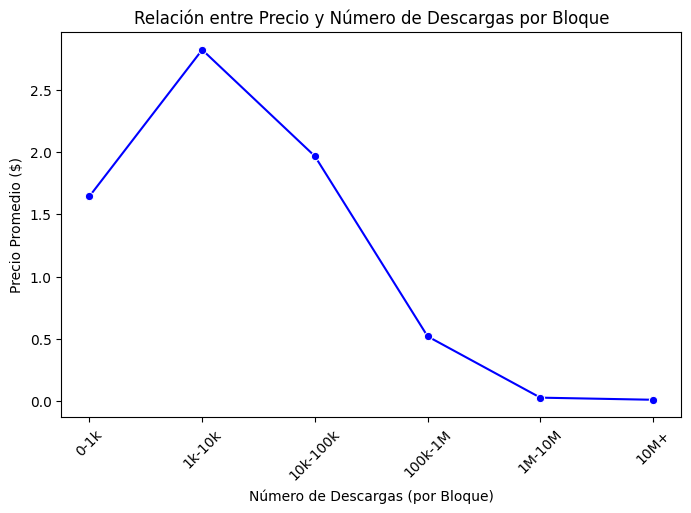

In [ ]:
# Agrupar por bloque de instalaciones y calcular el precio promedio
price_by_installs = df_apps.groupby('Installs_binned', observed=False)['Price'].mean().reset_index()

# Crear el gráfico de línea
plt.figure(figsize=(8, 5))
sns.lineplot(x='Installs_binned', y='Price', data=price_by_installs, marker='o', color='b')
plt.title('Relación entre Precio y Número de Descargas por Bloque')
plt.xlabel('Número de Descargas (por Bloque)')
plt.ylabel('Precio Promedio ($)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X
plt.show()

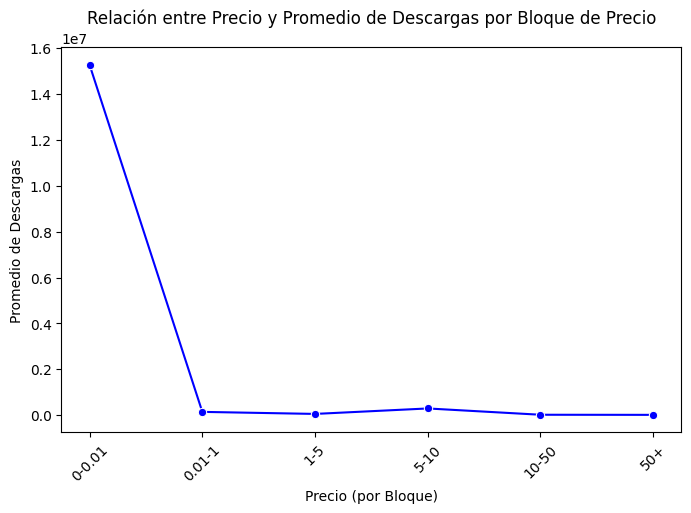

In [ ]:
# Agrupar por bloque de precios y calcular el promedio de cantidad de descargas
installs_by_price = df_apps.groupby('Price_binned', observed=False)['Installs'].mean().reset_index()

# Crear el gráfico de línea
plt.figure(figsize=(8, 5))
sns.lineplot(x='Price_binned', y='Installs', data=installs_by_price, marker='o', color='b')
plt.title('Relación entre Precio y Promedio de Descargas por Bloque de Precio')
plt.xlabel('Precio (por Bloque)')
plt.ylabel('Promedio de Descargas')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X
plt.show()

Ahora veamos el mismo gráfico pero sin el primer intérvalo de precios:

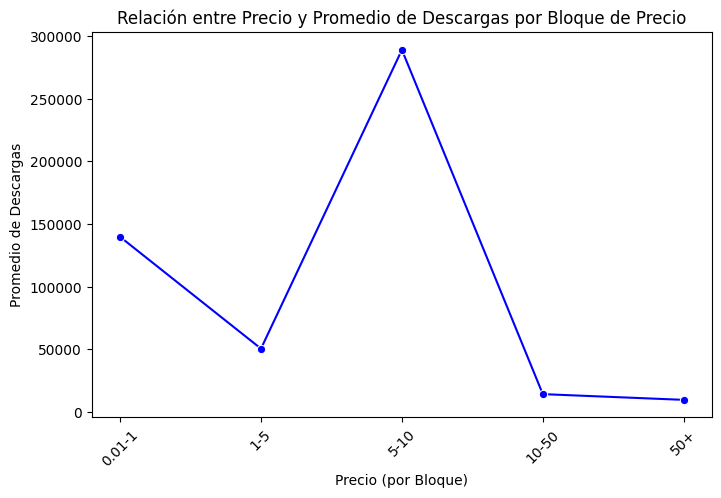

In [ ]:
# Agrupar por bloque de precios y calcular el promedio de cantidad de descargas
installs_by_price = df_apps.groupby('Price_binned', observed=False)['Installs'].mean().reset_index()

# Eliminar el primer bloque de precios (0-0.01)
installs_by_price = installs_by_price[installs_by_price['Price_binned'] != '0-0.01']

# Crear el gráfico de línea
plt.figure(figsize=(8, 5))
sns.lineplot(x='Price_binned', y='Installs', data=installs_by_price, marker='o', color='b')
plt.title('Relación entre Precio y Promedio de Descargas por Bloque de Precio')
plt.xlabel('Precio (por Bloque)')
plt.ylabel('Promedio de Descargas')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X
plt.show()

# **Confirmación de la Primera Parte de la Hipótesis:** 💡

La hipótesis plantea que "Las apps con precios más altos tienden a tener menos descargas". Según podemos observar de los gráficos anteriores esta afirmación se ha confirmado. A partir de los 5 dólares, **a medida que el precio de la aplicación aumenta, las descargas tienden a disminuir**. Si tenemos en cuenta que según nuestra hipótesis las Apps con costo igual o superior a 10 dólares son consideradas como del grupo de **"Apps con precios más altos"** entonces claramente la primera parte de la hipótesis se confirma y puede observarse de forma nítida en el último de los gráficos de línea.

Esto es coherente con el comportamiento general de los usuarios, donde prefieren aplicaciones gratuitas o de bajo costo, especialmente en mercados donde las alternativas son muchas y accesibles.



**Ahora sigamos con la segunda parte de la hipótesis: "su rating promedio es más alto en comparación con las apps gratuitas."** (Se refiere a que el rating promedio de las "Apps con precios más altos" es más alto que el de las Apps gratuitas).

Para poder determinar si se confirma o no está afirmación realicemos y veamos algunos gráficos:

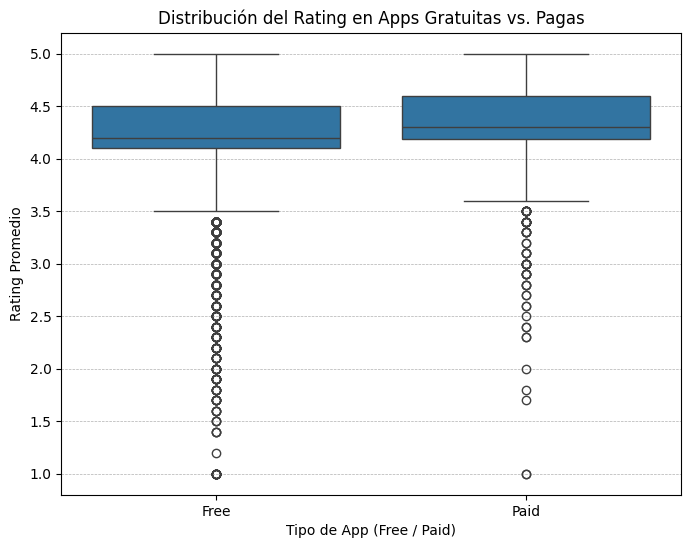

In [ ]:
# 2️⃣ Distribución del rating en apps gratuitas vs. pagas
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_apps, x="Type", y="Rating")
plt.xlabel("Tipo de App (Free / Paid)")
plt.ylabel("Rating Promedio")
plt.title("Distribución del Rating en Apps Gratuitas vs. Pagas")
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.show()

In [ ]:
promedio_rating = df_apps.groupby("Type")["Rating"].mean()
print(promedio_rating)

Type
Free   4.18
Paid   4.25
Name: Rating, dtype: float64


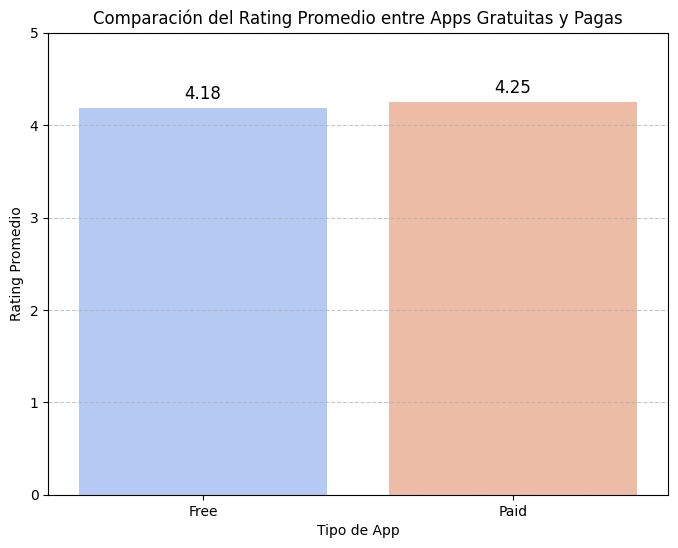

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=promedio_rating.index, y=promedio_rating.values, hue=promedio_rating.index, palette="coolwarm", legend=False)

plt.xlabel("Tipo de App")
plt.ylabel("Rating Promedio")
plt.title("Comparación del Rating Promedio entre Apps Gratuitas y Pagas")
plt.ylim(0, 5)  # Ajustar el eje Y para que se mantenga dentro del rango de calificaciones
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Agregar etiquetas con los valores exactos en las barras
for i, v in enumerate(promedio_rating.values):
    plt.text(i, v + 0.1, f"{v:.2f}", ha="center", fontsize=12)

plt.show()

Está claro que la calificación promedio de las Apps de pago es mayor al de las Apps gratuitas. Sin embargo, no debemos olvidar que nuestra segmento a analizar son las **Apps con precios más altos**, es decir, **aquellas de valor igual o superior a 10 dólares** (y no todo el conjunto de Apps de pago).

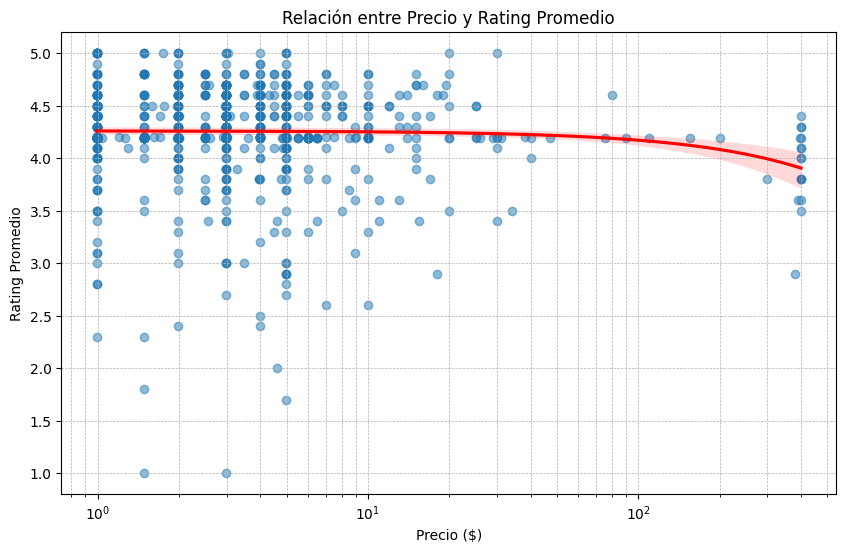

In [ ]:
# 3️⃣ Relación entre el precio y el rating promedio
plt.figure(figsize=(10, 6))
sns.regplot(data=df_apps[df_apps["Price"] > 0], x="Price", y="Rating", scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xscale("log")  # Escala logarítmica para ver mejor los datos
plt.xlabel("Precio ($)")
plt.ylabel("Rating Promedio")
plt.title("Relación entre Precio y Rating Promedio")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In [ ]:
promedio_rating_por_precio = df_apps.groupby("Price_binned", observed=True)["Rating"].mean()
print(promedio_rating_por_precio)

Price_binned
0-0.01   4.18
0.01-1   4.27
1-5      4.26
5-10     4.22
10-50    4.23
50+      4.00
Name: Rating, dtype: float64


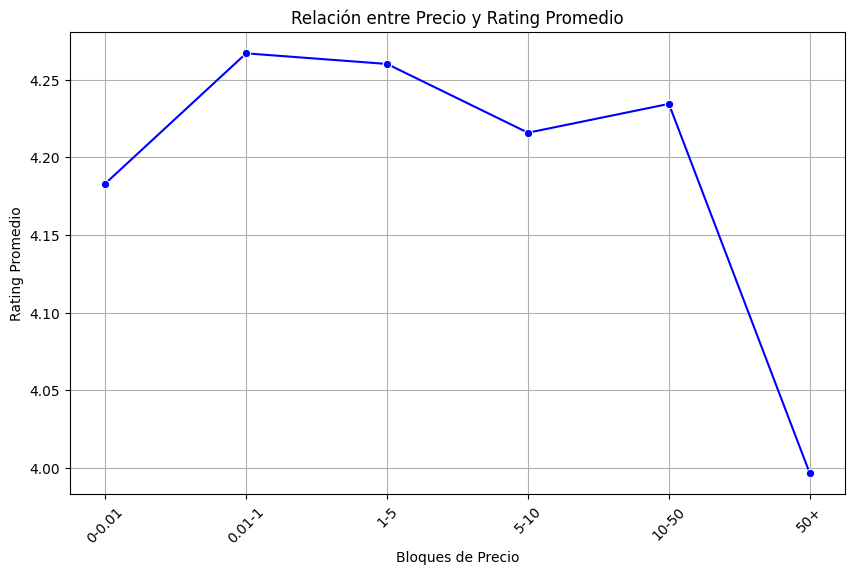

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_apps.groupby("Price_binned", observed=True)["Rating"].mean(), marker="o", color="b")
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si es necesario
plt.xlabel("Bloques de Precio")
plt.ylabel("Rating Promedio")
plt.title("Relación entre Precio y Rating Promedio")
plt.grid(True)
plt.show()

Estos gráficos muestran claramente que, **luego de determinado nivel de precio, a medida el precio de la App sube su calificación baja**. Pero... **¿bajará lo suficiente para encontrarse por debajo del promedio de calificación de las Apps gratuitas?**

**Llegamos al momento final del que depende si  la hipótesis se confirma o se refuta... El promedio de rating de las Apps gratuitas ¿es mayor o menor que el promedio de rating de las Apps más caras (precios iguales o mayores a los U$S 10,00)?**

El siguiente gráfico lo ilustrará:

Promedio de rating de las apps que valen igual o más de 10 dólares: 4.163399758136601
Promedio de rating de las apps gratuitas: 4.1831716184052015


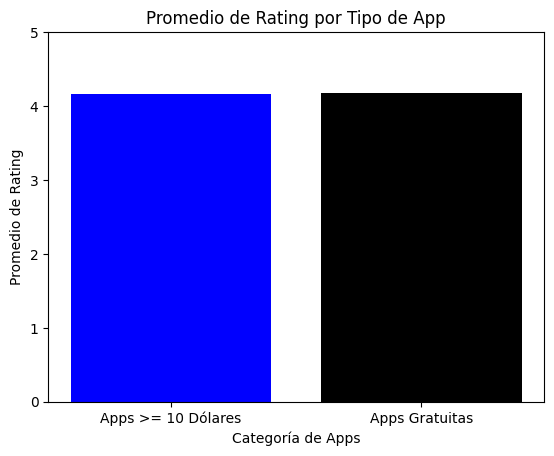

In [ ]:
# Filtramos las apps que tienen un precio mayor o igual a 10 dólares
apps_mas_10_dolares = df_apps[df_apps['Price'] >= 10]

# Filtramos las apps gratuitas (suponiendo que 'price' es 0 para apps gratuitas)
apps_gratuitas = df_apps[df_apps['Price'] == 0]

# Calculamos el promedio de la columna 'rating' solo para esas apps
promedio_rating_mas_10_dolares = apps_mas_10_dolares['Rating'].mean()
promedio_rating_gratuitas = apps_gratuitas['Rating'].mean()

# Imprimir los resultados
print(f"Promedio de rating de las apps que valen igual o más de 10 dólares: {promedio_rating_mas_10_dolares}")
print(f"Promedio de rating de las apps gratuitas: {promedio_rating_gratuitas}")

# Crear el gráfico de barras
categorias = ['Apps >= 10 Dólares', 'Apps Gratuitas']
promedios = [promedio_rating_mas_10_dolares, promedio_rating_gratuitas]

plt.bar(categorias, promedios, color=['blue', 'black'])
plt.xlabel('Categoría de Apps')
plt.ylabel('Promedio de Rating')
plt.title('Promedio de Rating por Tipo de App')
plt.ylim(0, 5)  # Para limitar el rango del eje Y (si el rating va de 0 a 5)
plt.show()

# **Refutación de la Segunda Parte de la Hipótesis:** 🤔

De acuerdo a los datos y gráfico anteriores esta segunda parte de la Hipótesis se refuta. **El promedio de calificación de las Apps con un precio igual o mayor a los 10 dólares ("Apps más caras") es inferior al promedio de calificación de las Apps gratuitas**.

Promedio de rating de las apps que valen igual o más de 10 dólares: 4.16

Promedio de rating de las apps gratuitas: 4.18

# 🧠**CONCLUSIÓN HIPÓTESIS:**

Luego de un análisis detallado de los datos, podemos afirmar que **la hipótesis se confirma parcialmente**.

En primer lugar, **la afirmación de que "las apps con precios más altos tienden a tener menos descargas" se valida con los datos analizados**. A partir de los 5 dólares, se observa una clara tendencia decreciente en la cantidad de descargas, y esta relación se vuelve aún más evidente en las aplicaciones con un precio igual o superior a 10 dólares, que hemos definido como el grupo de "apps con precios más altos". Este comportamiento es coherente con las preferencias generales de los usuarios, quienes tienden a optar por aplicaciones gratuitas o de bajo costo, especialmente en mercados con múltiples alternativas accesibles.

Sin embargo, **la segunda parte de la hipótesis —"las apps con precios más altos tienen un rating promedio más alto en comparación con las apps gratuitas"— se refuta**. Aunque en términos generales las aplicaciones de pago tienden a tener mejores calificaciones que las gratuitas, al centrarnos específicamente en el grupo de "apps con precios más altos" (precio igual o superior a 10 dólares), observamos que su calificación promedio es de 4.16, mientras que la de las apps gratuitas es de 4.18. Esto indica que, a partir de cierto umbral de precio, la calificación de las aplicaciones comienza a disminuir en lugar de aumentar.

Este resultado sugiere que, aunque los usuarios pueden valorar positivamente las aplicaciones de pago en general, cuando el precio es demasiado alto, las expectativas también aumentan. Si estas aplicaciones no cumplen con esas expectativas, es posible que reciban calificaciones más bajas en comparación con opciones gratuitas bien valoradas.

En conclusión, **confirmamos que las aplicaciones más costosas tienen menos descargas, pero refutamos la idea de que su rating promedio sea más alto que el de las apps gratuitas**. Esto abre la posibilidad de futuros estudios que exploren factores adicionales.

Para finalizar **una versión corregida de la hipótesis**, basada en los hallazgos del análisis podría ser:

**"Las apps con precios más altos tienden a tener menos descargas, y su rating promedio no es necesariamente superior al de las apps gratuitas, ya que a partir de cierto nivel de precio, la calificación tiende a disminuir."**

# **MACHINE LEARNING** 🤖

Este apartado marca el inicio de la segunda parte del trabajo, donde nos enfocaremos en la aplicación de **técnicas de Machine Learning**. A diferencia del Análisis Exploratorio de Datos (EDA), aquí plantearemos nuevos objetivos y buscaremos construir un modelo predictivo que complemente el ciclo de vida completo de un proyecto de ciencia de datos.

Para ello, estableceremos un **contexto comercial**, definiendo un **problema de negocio** concreto que pueda abordarse con nuestros datos. También brindaremos un **contexto analítico**, explorando las herramientas y modelos adecuados para la tarea.

## 🎯 **Objetivo**

**Construir un modelo que permita predecir la cantidad de descargas de una aplicación, en función de ciertas características relevantes, antes de su lanzamiento al mercado.**

¿Por qué perseguimos este objetivo?

Al desarrollar una aplicación, una de las mayores incertidumbres para las empresas y desarrolladores es cuántas descargas tendrá en el mercado. Anticipar este valor antes de su lanzamiento puede proporcionar una ventaja competitiva, permitiendo:

✔ Optimizar el diseño de la aplicación para aumentar su atractivo.


✔ Ajustar estrategias de marketing en función de características que impacten en la demanda.


✔ Reducir riesgos comerciales al prever el posible éxito o fracaso antes de invertir grandes recursos.

Queremos identificar qué combinaciones de características pueden influir en la cantidad de instalaciones de una aplicación. **Si logramos entender estos patrones, podremos diseñar aplicaciones con mayor potencial de éxito desde su concepción.**

### 📌 Contexto Comercial


El mercado de aplicaciones móviles es altamente competitivo y dinámico. Con millones de aplicaciones disponibles en diversas tiendas digitales, comprender qué factores influyen en la cantidad de descargas es clave para el éxito de un desarrollo. Empresas y desarrolladores buscan constantemente maneras de anticipar el rendimiento de una app antes de lanzarla, con el fin de tomar decisiones informadas sobre su diseño, monetización y estrategia de marketing.

La cantidad de descargas es un indicador fundamental del éxito de una aplicación, ya que impacta directamente en:

- Rentabilidad: una mayor cantidad de descargas suele traducirse en más ingresos, ya sea por compras dentro de la app, publicidad o modelos de suscripción.

- Posicionamiento en el mercado: aplicaciones con muchas instalaciones tienen mayor visibilidad en las tiendas, lo que genera un efecto de crecimiento exponencial.

- Competitividad: conocer qué características pueden influir en la cantidad de descargas permite desarrollar aplicaciones más atractivas y con mayores probabilidades de éxito.

El desafío para desarrolladores y empresas es que no siempre es evidente qué factores determinan la cantidad de descargas de una aplicación. Aspectos como el precio, la categoría o el tamaño de la app pueden jugar un rol importante, pero su impacto no siempre es lineal ni predecible.

A través del uso de técnicas de Machine Learning, buscamos identificar patrones y relaciones entre diferentes características de las aplicaciones y su popularidad, brindando una herramienta valiosa para el diseño y la toma de decisiones estratégicas en el desarrollo de apps.

### 📌 Problema Comercial
En un mercado digital saturado con millones de aplicaciones disponibles, predecir la cantidad de descargas antes del lanzamiento es un desafío clave para desarrolladores y empresas. La falta de esta información genera incertidumbre en la toma de decisiones estratégicas, impactando directamente en:

- Inversión en desarrollo: sin una estimación clara de su potencial de éxito, los desarrolladores pueden destinar recursos a aplicaciones con baja demanda.

- Estrategias de monetización: el modelo de negocio (app gratuita, de pago, con publicidad o suscripción) depende en gran medida de la cantidad de descargas esperadas.

- Marketing y posicionamiento: sin conocer los factores que influyen en la popularidad, las campañas publicitarias pueden ser ineficaces y costosas.

El problema radica en que no existe una fórmula única que determine qué hace que una aplicación tenga éxito en términos de descargas. Factores como el precio, la categoría o el tamaño de la app pueden influir, pero su impacto puede variar según diferentes combinaciones de características.

**¿Cómo podemos anticipar cuántas descargas tendrá una aplicación antes de su lanzamiento?**

Para abordar este desafío, utilizaremos técnicas de Machine Learning con el objetivo de encontrar patrones en los datos y construir un modelo predictivo que ayude a estimar la cantidad de descargas en función de características específicas.

Este análisis permitirá a desarrolladores y empresas tomar decisiones basadas en datos, minimizando riesgos y optimizando el diseño de sus aplicaciones para maximizar su éxito en el mercado.

### 📌 Contexto Analítico
Para abordar el problema comercial planteado y construir un modelo predictivo que estime la cantidad de descargas de una aplicación antes de su lanzamiento, es necesario adoptar un enfoque basado en ciencia de datos y Machine Learning.

En esta sección, detallaremos los pasos clave del análisis, incluyendo la selección de variables, el modelo elegido y la estrategia de evaluación.



📊 **Selección de Features (Variables Predictoras)**

Para determinar qué variables serán utilizadas en nuestro modelo de Machine Learning, aplicamos el método de feature selection **matriz de correlación**. Este enfoque nos permite identificar la relación entre la cantidad de descargas (Installs) y las demás variables disponibles en el dataset.

Veamos nuevamente nuestra matriz de correlación, la misma había sido ya analizada al momento de realizar nuestro análisis de datos explotarios (EDA):


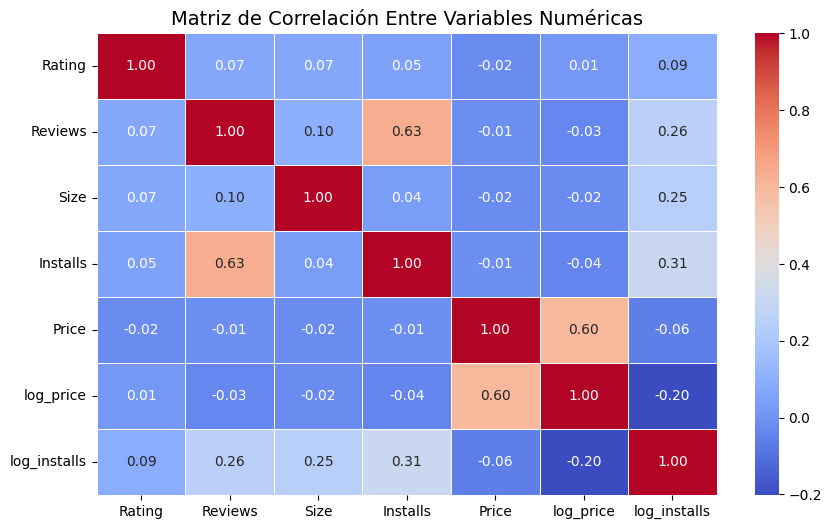

In [ ]:
# Filtrar solo las columnas numéricas
df_corr = df_apps.select_dtypes(include=["number"])

# Crear la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación Entre Variables Numéricas", fontsize=14)
plt.show()

📌 ¿Qué significa esto en términos de correlación?

Los coeficientes de correlación pueden variar entre -1 y 1:

🔵 -1 → Correlación negativa perfecta (cuando una variable sube, la otra baja).

⚪ 0 → Sin correlación (las variables no tienen relación).

🔴 1 → Correlación positiva perfecta (cuando una variable sube, la otra también sube).

📌 Regla general:

0.1 - 0.3 → Correlación muy débil o despreciable.

0.3 - 0.5 → Correlación débil/moderada.

0.5 - 0.7 → Correlación moderada a fuerte.

0.7 - 1.0 → Correlación fuerte.

Como vemos los resultados de la matriz de correlación muestran que **no existe una relación fuerte entre la cantidad de descargas y ninguna otra variable individualmente**, con una única excepción: la cantidad de reseñas (Reviews), que sí presenta una correlación significativa con las descargas. No obstante, esta variable no puede ser utilizada para nuestro objetivo, ya que las reseñas se generan una vez que la app ha sido descargada y utilizada, mientras que nosotros buscamos predecir la cantidad de descargas antes de su lanzamiento.

Ante esta situación, en lugar de descartar la posibilidad de predecir las descargas, optamos por explorar un enfoque diferente: **construir un modelo que considere combinaciones de variables**, basándonos en los insights obtenidos en el análisis exploratorio de datos (EDA).

El objetivo es identificar patrones más complejos que permitan determinar la cantidad de descargas esperadas para una nueva aplicación antes de su lanzamiento, ayudando así a tomar decisiones estratégicas para su diseño y posicionamiento en el mercado.

A continuación, **seleccionamos las variables** para la predicción de descargas. Estas incluyen:

**Price_Binned**: intervalo de precio en el que se encuentra la aplicación.

**Size**: tamaño de la aplicación en MB.

**Installs_Binned**: cantidad de descargas agrupadas en intervalos (variable objetivo).

**Type**: si la aplicación es gratuita o paga.

**Category**: la categoría a la que pertenece la app dentro de la tienda.

Para utilizar estas variables en un modelo de Machine Learning, es necesario convertir las variables categóricas en valores numéricos, asegurando que el algoritmo pueda procesarlas correctamente.


### **Selección del Modelo de Machine Learning** 🦾

Dado que contamos con datos históricos donde la variable objetivo (cantidad de descargas) ya está etiquetada, aplicaremos un modelo de aprendizaje supervisado, específicamente Regresión Lineal. Este tipo de modelo busca establecer una relación matemática entre una variable dependiente (descargas) y una o más variables independientes (características de la app, como precio, tamaño o categoría).

**Se procederá con los siguientes pasos:**

- Transformación de variables: Las variables categóricas serán convertidas en valores numéricos para que el modelo pueda procesarlas.

- División del dataset: Separaremos los datos en un conjunto de entrenamiento y otro de prueba para evaluar el rendimiento del modelo.

- Entrenamiento del modelo: Se ajustará la regresión lineal con los datos de entrenamiento.

- Evaluación del rendimiento: Se analizarán métricas como el Error Absoluto Medio (MAE), Error Cuadrático Medio (MSE) y Coeficiente de Determinación (R²) para medir la capacidad del modelo de explicar la variabilidad en las descargas.

- Prueba del modelo: En esta última instancia del proyecto, se someterá al modelo a una prueba práctica. Para ello, se presentará un caso hipotético de una nueva aplicación próxima a lanzarse al mercado, con sus propias características definidas. El objetivo es observar qué predicción realiza nuestro modelo respecto a la cantidad estimada de descargas, en base a los datos de entrada proporcionados.

## 1- Transformación de Variables 🔢

Primero traemos todas las librerías necesarias para ordenar nuestro entorno de trabajo:

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a la columna Category
df_apps['Category_encoded'] = label_encoder.fit_transform(df_apps['Category'])

# Ver las primeras filas para verificar la transformación
df_apps[['Category', 'Category_encoded']].drop_duplicates()

,Category,Category_encoded
0,ART_AND_DESIGN,0
49,AUTO_AND_VEHICLES,1
98,BEAUTY,2
139,BOOKS_AND_REFERENCE,3
187,BUSINESS,4
264,COMICS,5
302,COMMUNICATION,6
429,DATING,7
615,EDUCATION,8
745,ENTERTAINMENT,9


In [ ]:
# Convertir Price_binned en valores numéricos
label_encoder_price = LabelEncoder()
df_apps['Price_binned_encoded'] = label_encoder_price.fit_transform(df_apps['Price_binned'])

# Verificar la transformación
df_apps[['Price_binned', 'Price_binned_encoded']].drop_duplicates()

,Price_binned,Price_binned_encoded
0,0-0.01,0
233,1-5,2
430,5-10,4
1935,0.01-1,1
1990,10-50,3
1995,50+,5


In [ ]:
# Convertir Type a valores numéricos
label_encoder = LabelEncoder()
df_apps['Type_encoded'] = label_encoder.fit_transform(df_apps['Type'])

# Verificar la transformación
df_apps[['Type', 'Type_encoded']].drop_duplicates()

,Type,Type_encoded
0,Free,0
233,Paid,1


In [ ]:
# Aplicar log(1 + Installs) para reducir la escala de valores
df_apps['Installs_log'] = np.log1p(df_apps['Installs'])

## 2- División del Dataset 🧮

In [ ]:
# Definir variables predictoras y objetivo
X = df_apps[['Type_encoded', 'Category_encoded', 'Size', 'Price_binned_encoded']]
y = df_apps['Installs_log']

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3- Entrenamiento del Modelo 🤖📚

In [ ]:
# Crear el modelo de Regresión Lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

LinearRegression()

## 4- Evaluación del Rendimiento del Modelo 🤖📈

In [ ]:
# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R²: {r2:.4f}')

MAE: 1.48
MSE: 2.81
R²: 0.0037


Evaluamos su desempeño utilizando métricas estándar como MAE (Error Absoluto Medio), MSE (Error Cuadrático Medio) y R² (Coeficiente de Determinación).

Los resultados obtenidos indican que **el modelo de regresión lineal no logra predecir con precisión la cantidad de descargas de una aplicación basándose en las variables seleccionadas**. El bajo valor de R² sugiere que los factores utilizados en el modelo tienen una influencia muy limitada sobre la cantidad de descargas, **lo que puede deberse a la falta de una relación significativa entre las variables**.

# 5- PROBEMOS NUESTRO MODELO! 🦾🤖

A pesar de las limitaciones mencionadas, veamos un ejemplo práctico: supongamos que una nueva aplicación está por lanzarse al mercado. **Utilizaremos nuestro modelo recién entrenado para predecir cuántas descargas podría alcanzar, en función de sus características previas al lanzamiento!**



Características:

- Tipo: Gratis (Type_encoded = 0)

- Categoría: GAME (Category_encoded = 14)

- Tamaño: 30 MB

- Intervalo de precio: Gratuita o muy bajo precio (Price_binned_encoded = 0)

In [ ]:
# Crear un nuevo registro como DataFrame, usando los nombres de columnas del modelo
nuevo_registro = pd.DataFrame([{
    'Type_encoded': 0,
    'Category_encoded': 14,
    'Size': 30.0,
    'Price_binned_encoded': 0
}])

# Predecir en escala logarítmica
prediccion_log = modelo.predict(nuevo_registro)

# Transformar la predicción del logaritmo a valor real
prediccion_real = np.exp(prediccion_log)

print(f'Cantidad estimada de descargas: {prediccion_real[0]:,.0f}')

Cantidad estimada de descargas: 131,965


### CONCLUSIÓN 🧠

🔍 El modelo predijo que una aplicación con estas características tendría aproximadamente 131.965 descargas.

Esta estimación permite anticipar, de forma orientativa, cuántas instalaciones podría alcanzar una aplicación antes de ser lanzada, si sus características coinciden con las de registros previos. Sin embargo, es importante tener en cuenta el bajo desempeño del modelo (R² = 0.13), lo cual indica que su capacidad explicativa es limitada.

## 🔁 **Segundo intento con otro modelo**

Dado que los resultados obtenidos con la regresión lineal no fueron los esperados, se propone realizar un segundo intento utilizando un enfoque distinto. En este caso, se empleará el algoritmo Random Forest Classifier, un modelo de aprendizaje supervisado basado en árboles de decisión, que podría adaptarse mejor a las características de los datos y ofrecer un mejor desempeño en la predicción de los intervalos de descargas.

In [ ]:
# Convertir Installs_binned en valores numéricos
label_encoder_installs = LabelEncoder()
df_apps['Installs_binned_encoded'] = label_encoder_installs.fit_transform(df_apps['Installs_binned'])

# Verificar la transformación
df_apps[['Installs_binned', 'Installs_binned_encoded']].drop_duplicates()

,Installs_binned,Installs_binned_encoded
0,10k-100k,3
1,100k-1M,1
2,1M-10M,4
3,10M+,2
15,1k-10k,5
431,0-1k,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Definir variables predictoras y variable objetivo
X = df_apps[['Price_binned_encoded', 'Size']]  # Variables predictoras
y = df_apps['Installs_binned_encoded']  # Variable objetivo (descargas por intervalo)

# Dividir datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de clasificación
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.4f}')  # Precisión global

# Reporte detallado
print(classification_report(y_test, y_pred, target_names=label_encoder_installs.classes_))

Precisión del modelo: 0.2915
              precision    recall  f1-score   support

        0-1k       0.27      0.37      0.31       362
     100k-1M       0.18      0.09      0.12       318
        10M+       0.38      0.46      0.41       368
    10k-100k       0.25      0.12      0.16       304
      1M-10M       0.29      0.43      0.35       448
      1k-10k       0.26      0.15      0.19       272

    accuracy                           0.29      2072
   macro avg       0.27      0.27      0.26      2072
weighted avg       0.28      0.29      0.27      2072



### Interpretación:

🔹 Precisión global del modelo (accuracy):
0.2915, es decir, el modelo acierta aproximadamente en el 29% de los casos. Esto está por encima del azar (que sería ~16% si las clases estuvieran balanceadas), pero aún es bajo para un modelo útil en producción. Aun así, sirve como punto de análisis para sacar conclusiones.

Precisión (precision): De todos los casos que el modelo predijo como esa clase, ¿cuántos eran correctos?

Recall (recall): De todos los casos reales de esa clase, ¿cuántos logró detectar el modelo?

F1-score: Un equilibrio entre precisión y recall (especialmente útil cuando las clases están desbalanceadas).

Soporte (support): Cuántas muestras reales hay de cada clase.


📦 Conclusión del análisis:

Aunque el modelo no alcanza buenos niveles de precisión, sí sugiere que existen algunos patrones que permiten diferenciar las apps con muchas descargas de las que tienen pocas. Sin embargo, los datos disponibles no son lo suficientemente sólidos como para hacer predicciones confiables en todos los casos.

### Realicemos un tercer intento 🙌

Vamos a utilizar el mismo enfoque, es decir se empleará el algoritmo Random Forest Classifier, sólo que esta vez se usará como variable independiente sólo "Size" (tamaño de la App en MB):

In [ ]:
df_size_avg = df_apps.groupby('Installs_binned', observed=False)['Size'].mean().reset_index()

# Ver el resultado
print(df_size_avg)

  Installs_binned  Size
0            0-1k 13.78
1          1k-10k 13.99
2        10k-100k 16.37
3         100k-1M 20.44
4          1M-10M 24.80
5            10M+ 28.05


In [ ]:
# Definir variables predictoras y variable objetivo
X = df_apps[['Size']]  # Solo usamos el tamaño
y = df_apps['Installs_binned_encoded']  # Variable objetivo

# Dividir datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.4f}')

# Reporte detallado
print(classification_report(y_test, y_pred, target_names=label_encoder_installs.classes_))

Precisión del modelo: 0.2790
              precision    recall  f1-score   support

        0-1k       0.27      0.41      0.33       362
     100k-1M       0.16      0.08      0.11       318
        10M+       0.36      0.46      0.40       368
    10k-100k       0.22      0.12      0.15       304
      1M-10M       0.28      0.38      0.32       448
      1k-10k       0.24      0.10      0.14       272

    accuracy                           0.28      2072
   macro avg       0.25      0.26      0.24      2072
weighted avg       0.26      0.28      0.26      2072



### 🔍 Interpretación:
Al igual que en el caso anterior, **los resultados obtenidos en este nuevo intento con un conjunto diferente de variables no son satisfactorios**. La precisión general del modelo fue de apenas 27.90%, y las métricas por clase muestran una vez más un bajo desempeño, especialmente en las categorías intermedias. Esto confirma que, con los datos actuales, no es posible construir un modelo de clasificación fiable que permita predecir el rango de descargas de una app antes de su lanzamiento.

## 🧪 Último intento: modelo con alta correlación
Como cierre del apartado de Machine Learning, realizaremos un **último intento de modelado**, esta vez con un enfoque distinto. Hasta el momento, hemos comprobado que no es posible construir un modelo con buen desempeño para predecir la cantidad de descargas de una aplicación a partir de las variables disponibles en el dataset. Sin embargo, con el objetivo de mostrar cómo luce un modelo cuando **sí existe una relación fuerte entre variables**, decidimos entrenar un modelo predictivo utilizando las dos variables con mayor correlación observada en la matriz de correlación:** "Reviews" (reseñas) y "Installs" (descargas)**, con una correlación de 0.63.

En este caso, la variable objetivo será la cantidad de reseñas ("Reviews") que podría recibir una aplicación, en función de la cantidad de descargas que obtuvo. Aunque **no se trata de un modelo aplicable para anticipar el rendimiento de una app antes de su lanzamiento**, sí resulta útil para **entender el comportamiento del modelo cuando los datos presentan un patrón más claro y predecible**, y también puede ayudar a estimar cuánta interacción posterior a la descarga podría recibir una app una vez que esté disponible.

Este ejemplo servirá como **contraste ilustrativo**, mostrándonos cómo se comporta un algoritmo cuando se trabaja con variables que sí guardan una relación significativa entre sí.

MAE: 418421.06
MSE: 6154787974789.14
R²: 0.4181


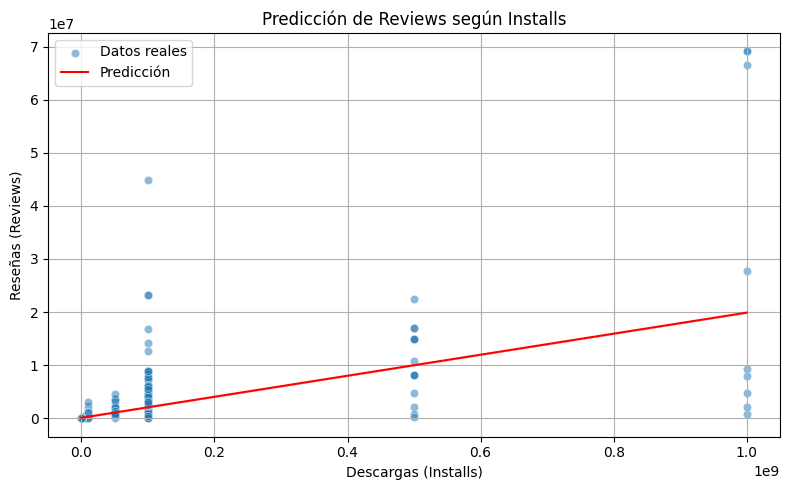

In [ ]:
# Definir variables
X = df_apps[['Installs']]  # Variable predictora
y = df_apps['Reviews']     # Variable objetivo

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R²: {r2:.4f}')

# Visualización del ajuste del modelo
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['Installs'], y=y_test, label='Datos reales', alpha=0.5)
sns.lineplot(x=X_test['Installs'], y=y_pred, color='red', label='Predicción')
plt.title('Predicción de Reviews según Installs')
plt.xlabel('Descargas (Installs)')
plt.ylabel('Reseñas (Reviews)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 📊 Interpretación del Modelo:

El modelo de regresión lineal que predice la cantidad de reseñas (Reviews) a partir de la cantidad de descargas (Installs) muestra un rendimiento claramente superior a los modelos previos:

- MAE (Error Absoluto Medio): 418.421 → En promedio, el modelo se equivoca por unas 418 mil reseñas. Si bien es un número alto, hay que tener en cuenta que en el dataset existen aplicaciones con millones de reseñas, por lo que ese error puede ser razonable en ese contexto.

- MSE (Error Cuadrático Medio): 6,15 billones → Este valor es sensible a los errores grandes, lo que indica que aún hay outliers o aplicaciones con valores extremos que afectan el modelo.

- R²: 0.4181 → Aproximadamente el 42% de la variabilidad en la cantidad de reseñas puede explicarse por la cantidad de descargas, lo cual es un desempeño aceptable tratándose de un modelo simple y una única variable predictora.

Este resultado confirma lo que habíamos anticipado en la matriz de correlación: la cantidad de descargas y la cantidad de reseñas están significativamente relacionadas (correlación de 0.61). **Aunque no es perfecto, este modelo es el más sólido de todos los probados hasta ahora y puede considerarse una referencia útil**.

# 🏁 **CONCLUSIÓN GENERAL Y REFLEXIONES FINALES** ⭐

Este proyecto atravesó cada una de las **etapas fundamentales del ciclo de vida de un proyecto de ciencia de datos**, desde la recolección y comprensión inicial del dataset hasta la construcción, evaluación e interpretación de modelos predictivos. El camino recorrido no solo implicó programar modelos, sino también dedicar una parte sustancial del tiempo al tratamiento, análisis y comprensión de los datos.

En primer lugar, se realizó una **limpieza profunda y transformación del dataset**, abordando desafíos comunes pero críticos en cualquier proyecto de datos reales: tratamiento de valores nulos, corrección y eliminación de registros erróneos o duplicados, conversión de tipos de datos, detección de outliers y creación de nuevas variables más representativas a partir de otras existentes. También se aplicaron técnicas de codificación para poder adaptar variables categóricas a modelos de machine learning, lo cual permitió estructurar la información en un formato útil y procesable.

Luego, se llevó adelante un completo **análisis exploratorio de datos**, tanto desde una mirada descriptiva como visual. Se analizaron variables cuantitativas y cualitativas con gráficos univariantes, bivariantes y matrices de correlación, lo que permitió descubrir patrones relevantes, validar supuestos, responder preguntas iniciales y generar hipótesis sobre el comportamiento de las aplicaciones en el mercado. Este trabajo sirvió como base sólida para todo lo que vino después.

A partir de ese diagnóstico inicial, se definieron los objetivos concretos del proyecto y se desarrollaron modelos predictivos buscando estimar la cantidad de descargas que una aplicación podría alcanzar antes de ser lanzada, basándonos en distintas combinaciones de variables. Sin embargo, los resultados mostraron un desempeño limitado. Los modelos, tanto de regresión lineal como de clasificación, no lograron predecir con precisión la variable objetivo.

Este hallazgo no debe interpretarse como un fracaso, **sino como un insight valioso en sí mismo**. La falta de buen rendimiento de los modelos nos permite concluir que, con la información actualmente disponible en el dataset, **no es posible construir un modelo robusto que anticipe el éxito de una app en términos de descargas**. Probablemente, porque las variables que realmente explican ese éxito —como la propuesta de valor, el momento del lanzamiento, la experiencia del usuario, el marketing o la reputación del desarrollador— no están incluidas o no son fácilmente cuantificables en este conjunto de datos.

A pesar de ello, se identificaron **relaciones fuertes entre otras variables**, como la cantidad de descargas y la cantidad de reseñas (reviews), lo que permitió construir un modelo alternativo con muy buen desempeño. Este hallazgo demuestra que, incluso cuando el objetivo original no se alcanza, el camino recorrido permite abrir nuevas oportunidades de análisis y seguir extrayendo valor del proceso.

Este proyecto deja una enseñanza clave: **en el mundo de los datos, incluso los caminos que no llevan al resultado esperado nos conducen a descubrimientos importantes**. A veces, entender por qué un modelo no funciona es tan revelador como encontrar uno que sí lo hace.

El futuro del análisis de datos es prometedor y está lleno de posibilidades. Con más y mejores fuentes de información, nuevas herramientas y una actitud crítica y creativa, los modelos predictivos se volverán cada vez más precisos, útiles y transformadores. Lo importante es seguir preguntando, seguir explorando y nunca dejar de aprender. Porque en los datos hay respuestas… pero también preguntas que aún no sabemos que debemos hacernos.

**Agradecimiento Final** 👋

Gracias por tomarte el tiempo de leer este trabajo. Espero que haya resultado interesante y útil para comprender el valor del análisis de datos y su potencial en la toma de decisiones. ¡Hasta la próxima! 📊✨

## Autor: Alejandro Traversa Olazabal 👨‍💻

🔗 https://www.linkedin.com/in/alejandro-traversa-olazabal/

🔗 https://github.com/TraversaOlazabal